<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/CreditCardClustering/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CREDIT CARD CLUSTERING USING DBSCAN METHOD**

This case requires to develop a customer segmentation to define marketing strategy using DBScan Method. Before we get into the introduction of the dataset, it's important to know what is DBScan method.

What is DBScan Method? DBScan is a clustering algorithm that defines clusters as continuous regions of high density and works well if all the clusters are dense enough and well separated by low-density regions.

This sample dataset summarize the usage behaviour of about 9000 active credit card holders during the last 6 months.

Here are the following the data dictionary for credit card dataset:
* CUST_ID: Identification of Credit Card holder.
* BALANCE: Balance of amount left in their account to make purchases.
* BALANCE_FREQUENCY: How frequently the Balance is updated. Score between 0 and 1.
  * 1= Frequently updated
  * 0= Not Frequently updated
* PURCHASES: Amount of purchases made from account.
* ONEOFF_PURCHASES: Maximum purchase amount done in one-go.
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment.
* CASH_ADVANCE: Cash in advance given by the user.
* PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1.
  * 1 = Frequently purchased
  * 0= Not Frequently purchased
* ONEOFFPURCHASESFREQUENCY: How frequently purchases are happening in one-go.
  * 1= Frequently purchased
  * 0= Not Frequently purchased
* PURCHASEINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done.
  * 1= Frequently done
  * 0= Not Frequently done
* CASHADVANCEFREQUENCY: How frequently the cash in advance being paid.
* CASHADVANCETRX: Number of Transactions made with "Cash in Advanced".
* PURCHASES_TRX: Number of Transactions made.
* CREDIT_LIMIT: Limit of credit card user.
* PAYMENTS: Amount of payment done by user.
* MINIMUM_PAYMENTS: Minimum amount of payments made by user.
* PRCFULLPAYMENT: Percent of full payment paid by user.
* TENURE: Tenure of credit card service by user.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as s

import matplotlib.pyplot as plt
%matplotlib inline


import math

from sklearn.preprocessing import StandardScaler

Lets first load our dataset and take a look to decide our approach towards this solving problem.

In [3]:
dfw = pd.read_csv("CC GENERAL.csv" )
dfw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
dfw.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
dfw.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Looking at the reports we can see that most of the features have mean way greater than their median. This is a sign of some skewness in the dataset and we have to see if we can do something about it.

We also have some Nan values to impute there.

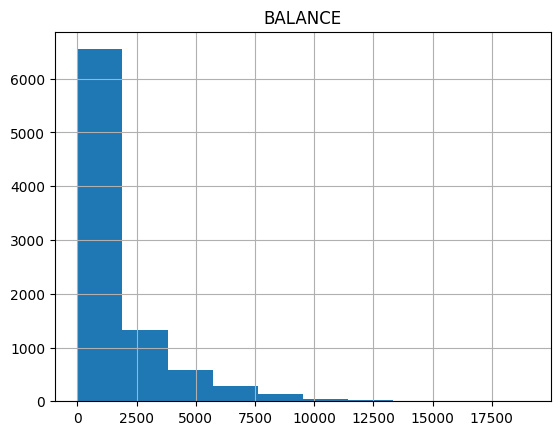

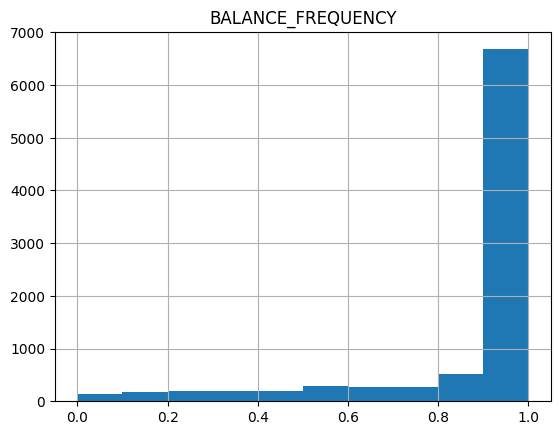

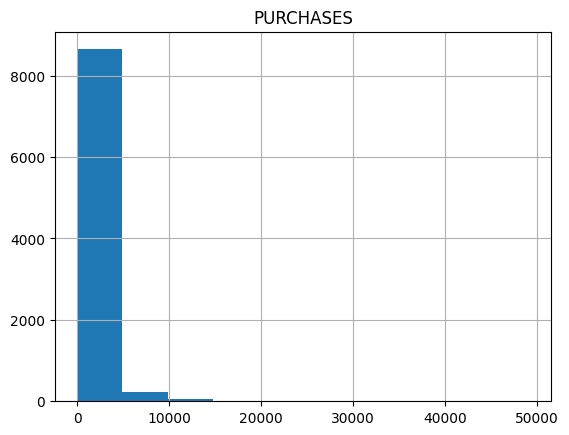

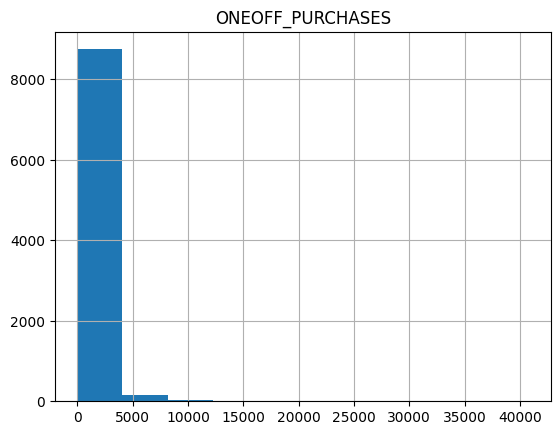

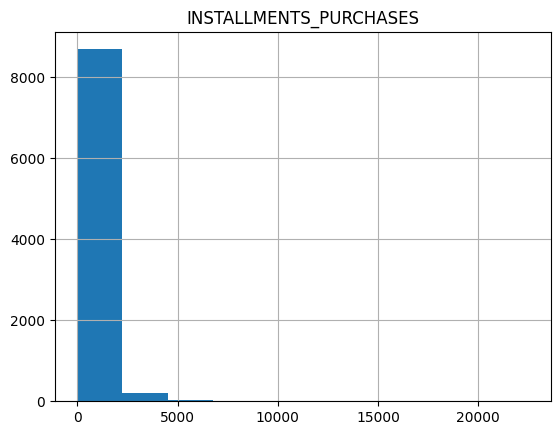

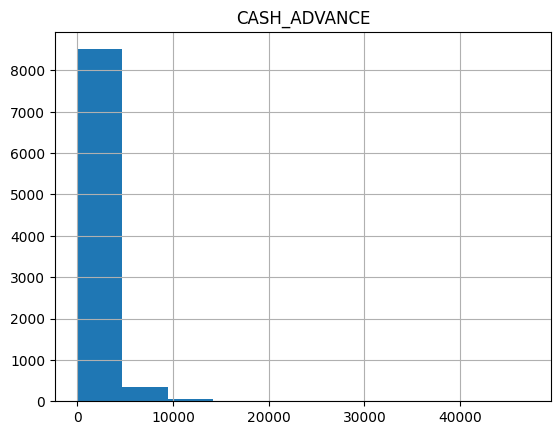

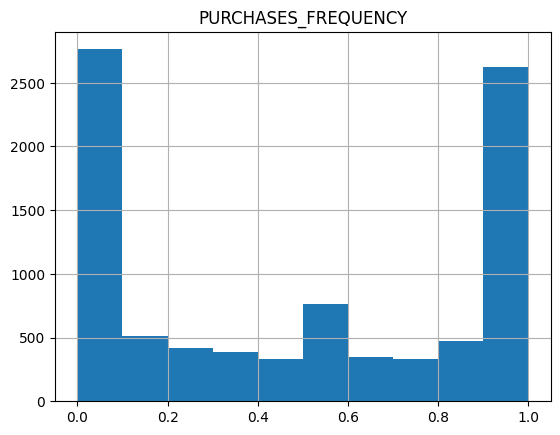

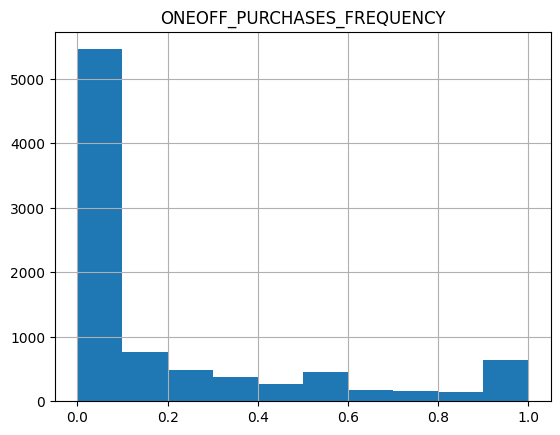

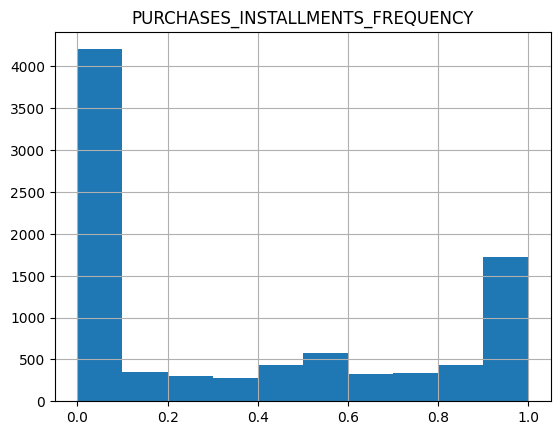

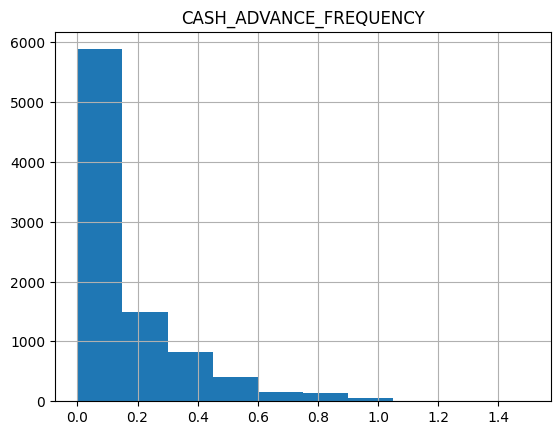

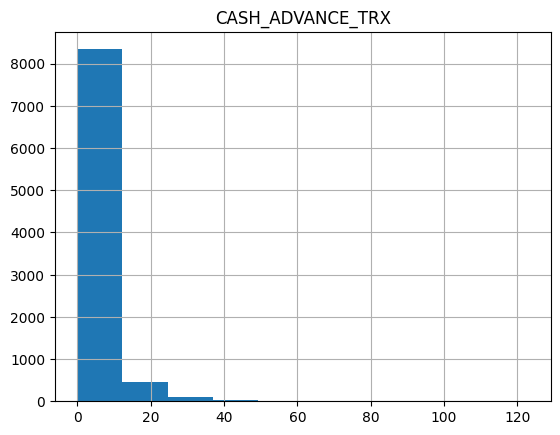

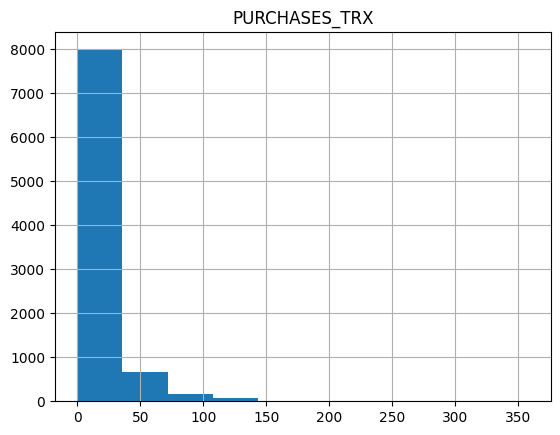

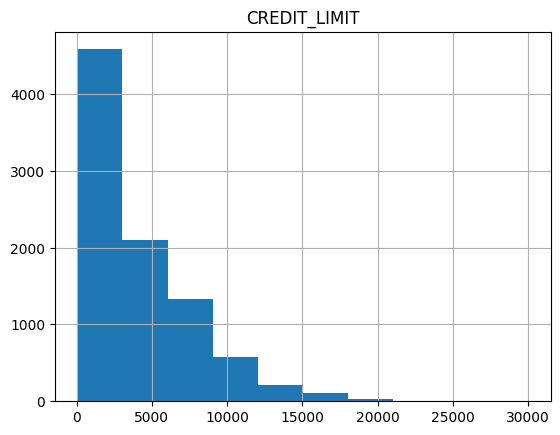

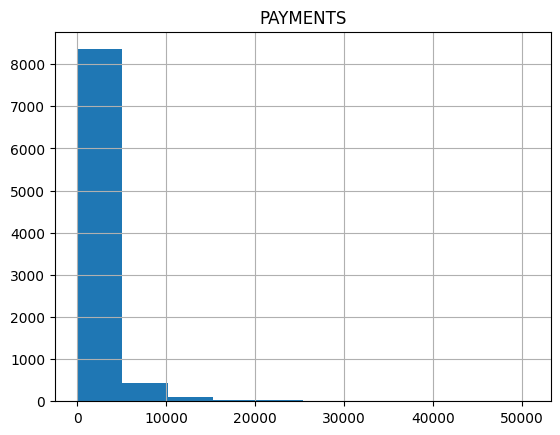

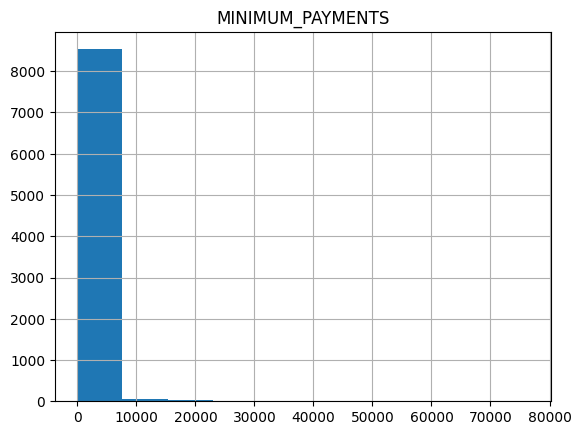

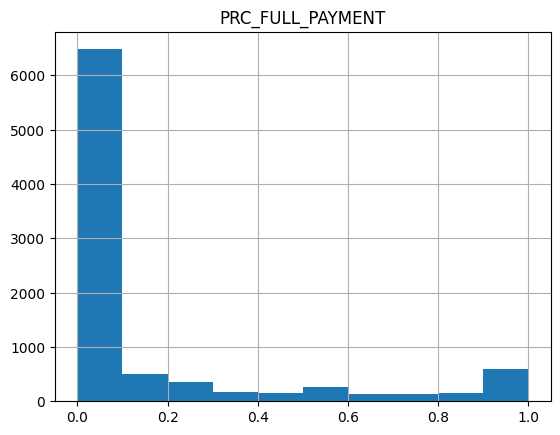

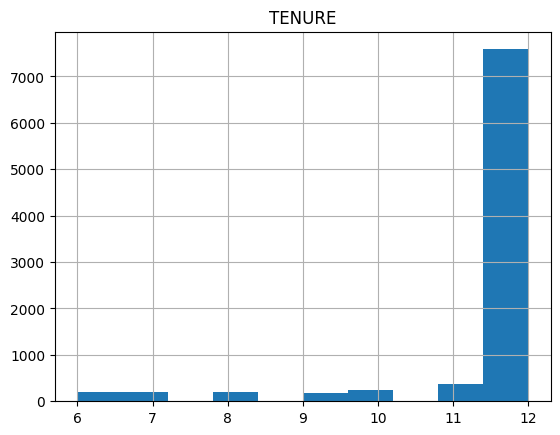

In [ ]:
dfh = dfw.copy()
dfh.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

for col in dfh:
    dfh[[col]].hist()

<ipython-input-9-87130db1b4dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfw.corr() , annot=True)


<Axes: >

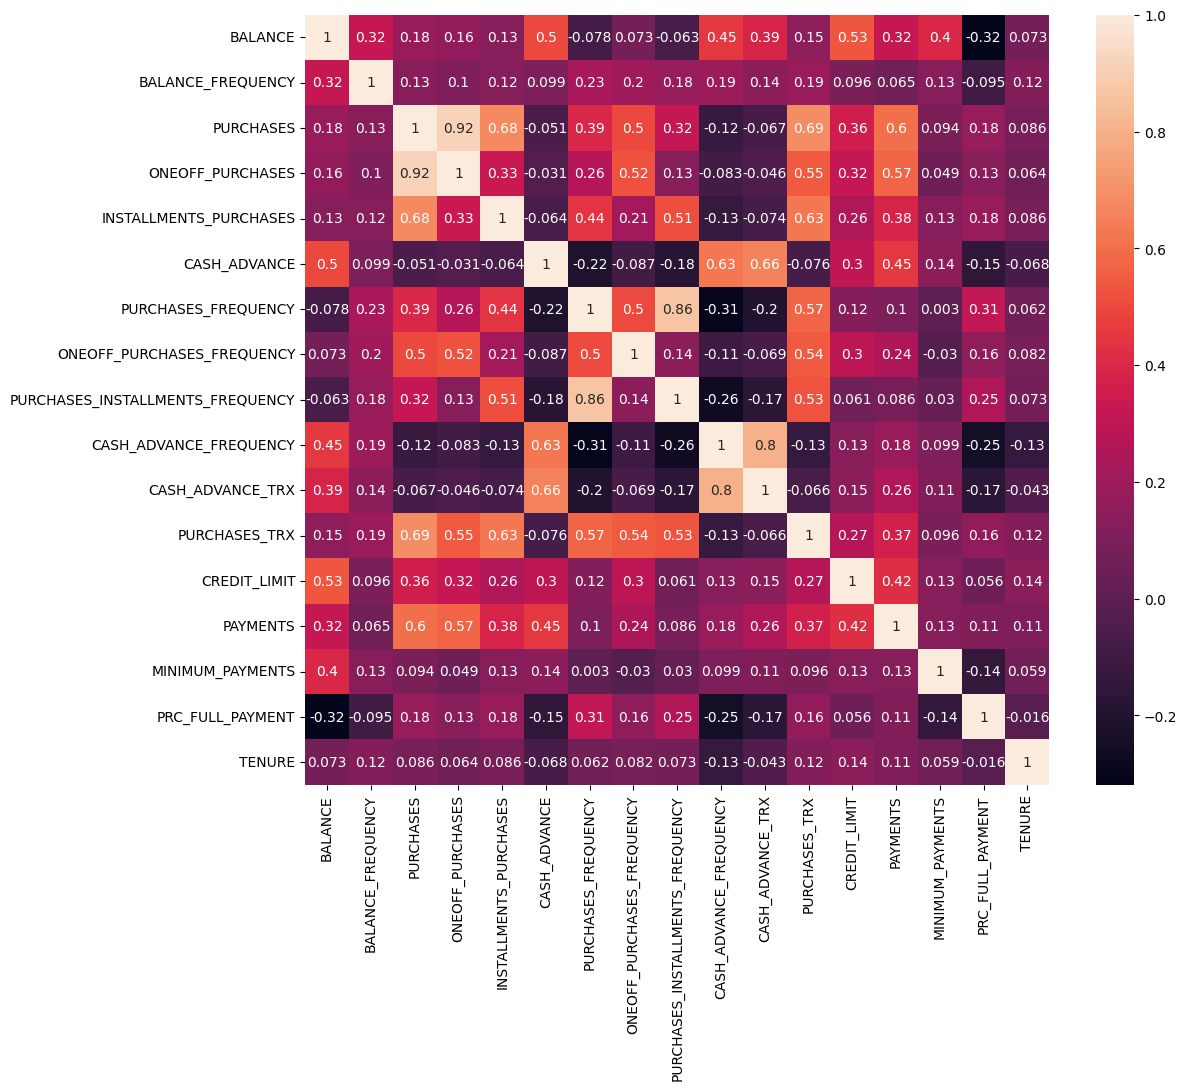

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(dfw.corr() , annot=True)

We can observe and validate few observations here:

* Purchases, oneoffpurchases and investment purchases are highly correlated. That is most of the purchases are oneoffpurchases.
* People dont make full payments when the balance is high.
* Purchase frequency and cash advance frequency are inversely correlated. That is as the purchase frequency is high, the number of times cash is paid in advance is less and vice-versa.

In [ ]:
dfh.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
dfh.loc[(dfh['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dfh['MINIMUM_PAYMENTS'].mean()
dfh.loc[(dfh['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dfh['CREDIT_LIMIT'].mean()

In [ ]:
dfh.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

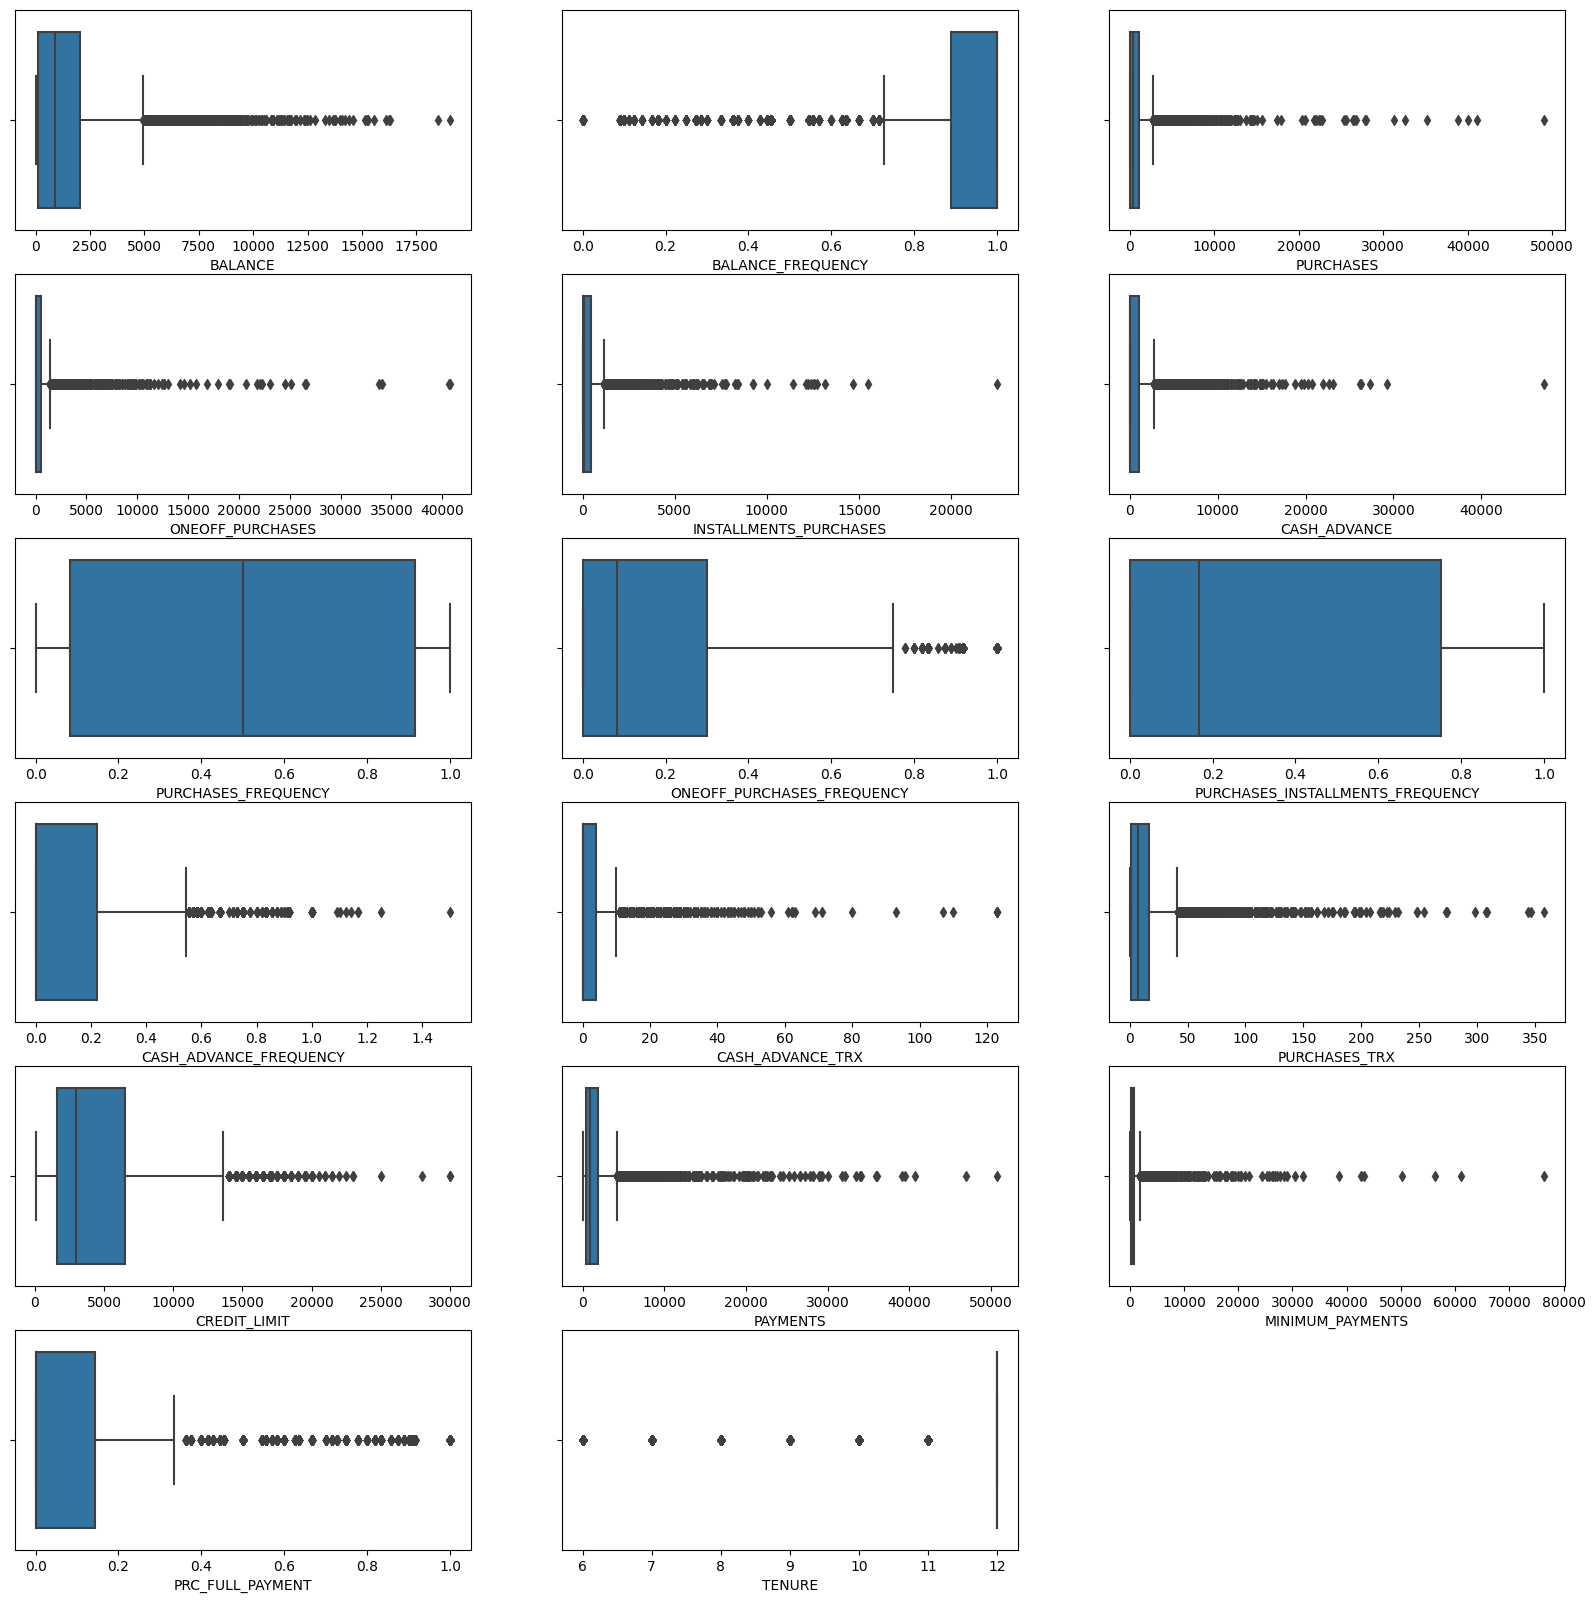

In [ ]:
fig = plt.figure(figsize=(20,20))
for col in range(len(dfh.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=dfh.iloc[ : , col])
plt.show()

We did a Boxplot of the data to see if there were outliers and we found a large number of outliers in the data

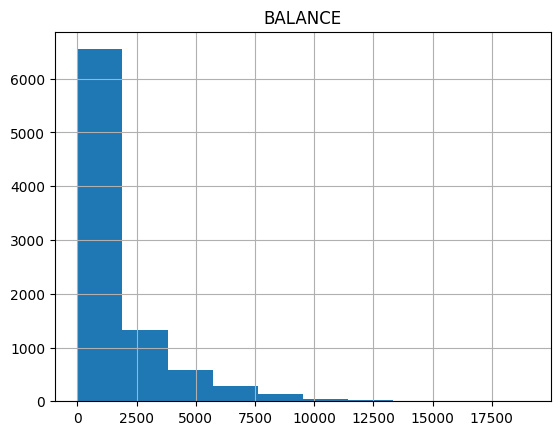

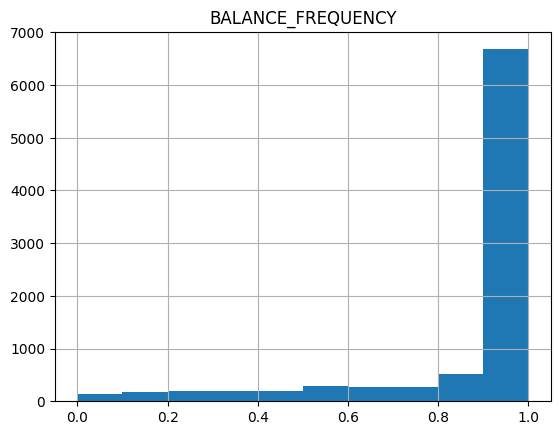

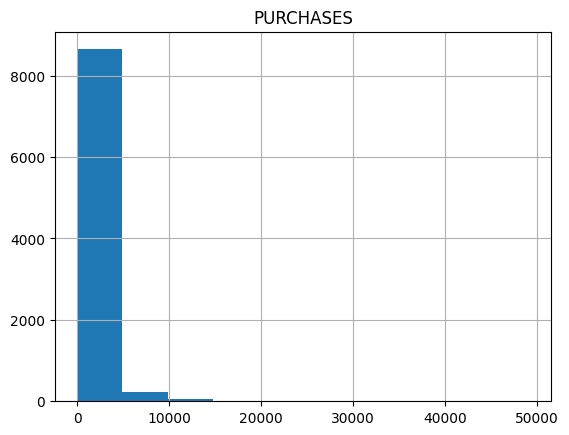

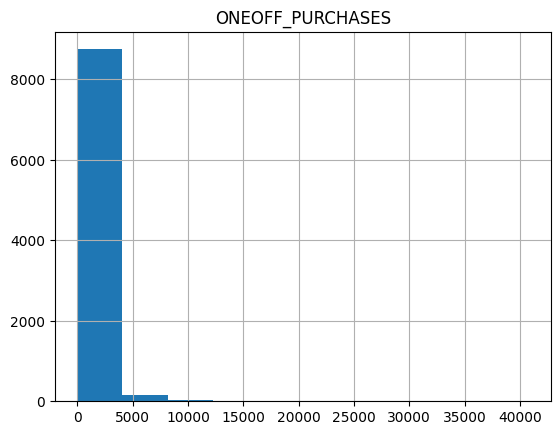

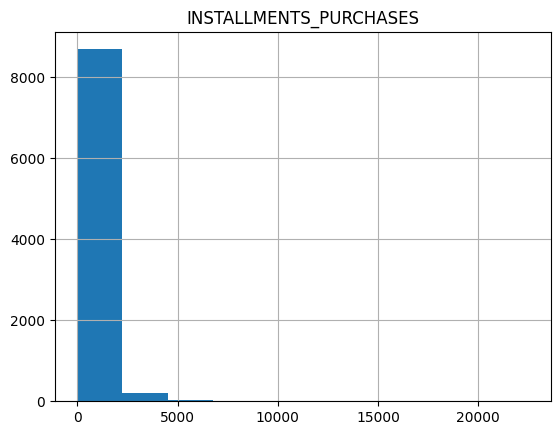

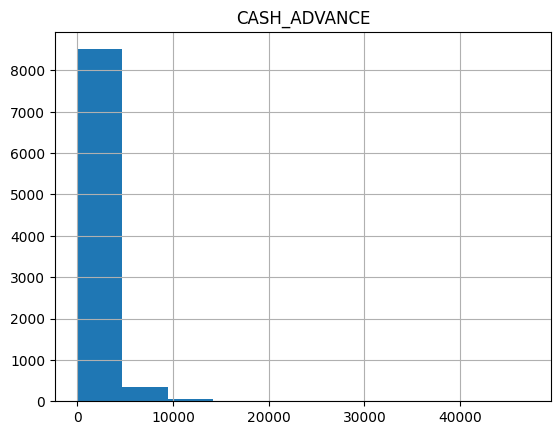

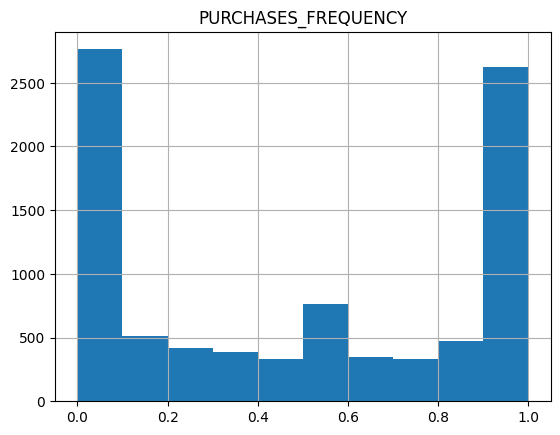

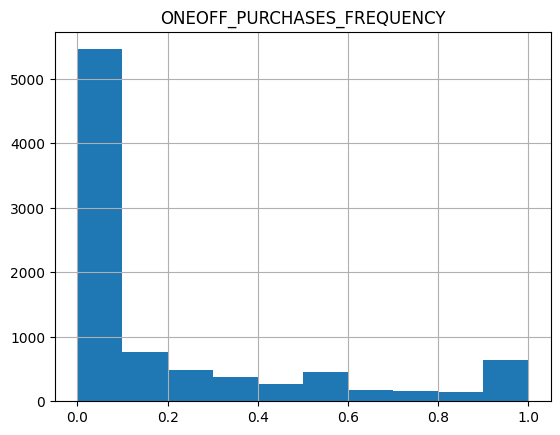

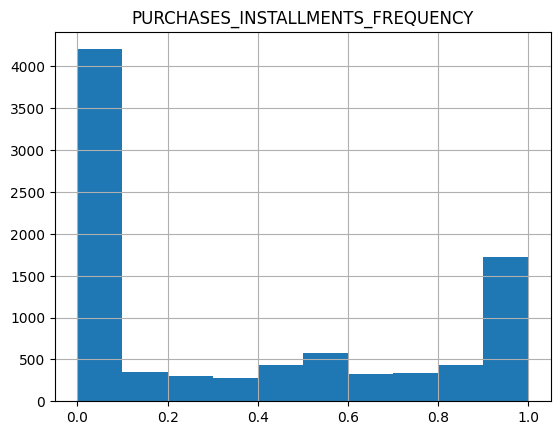

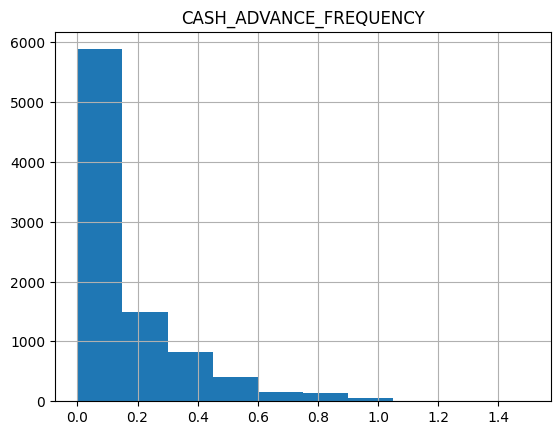

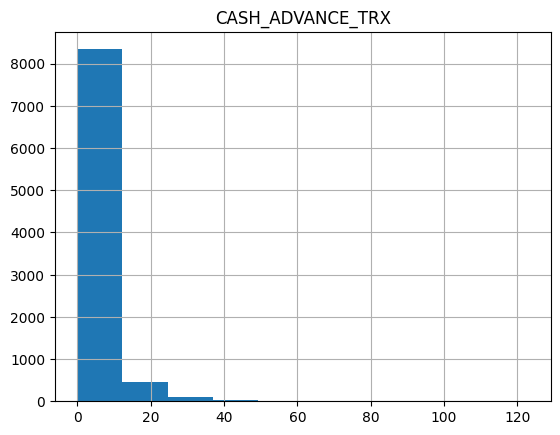

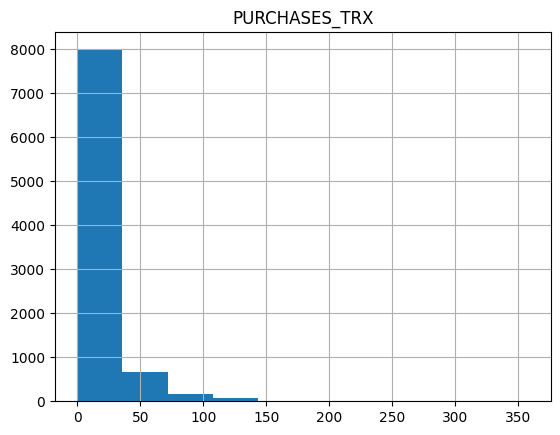

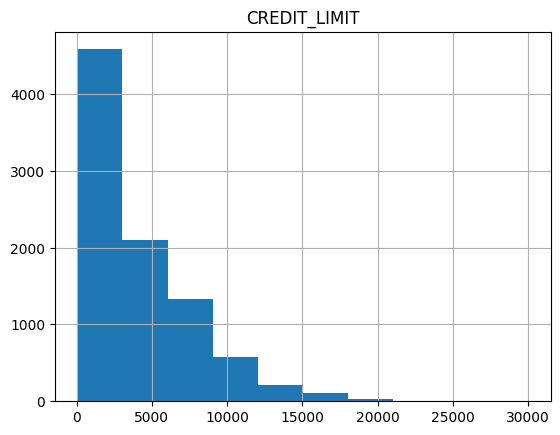

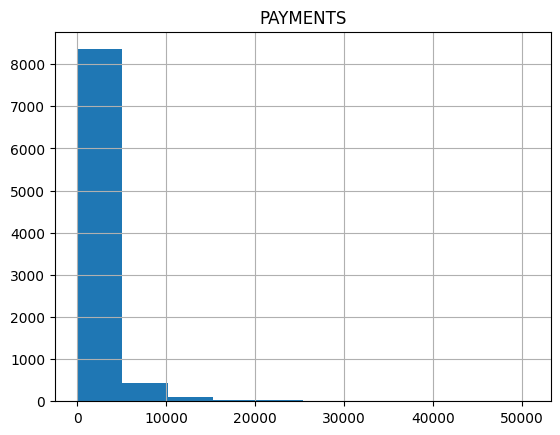

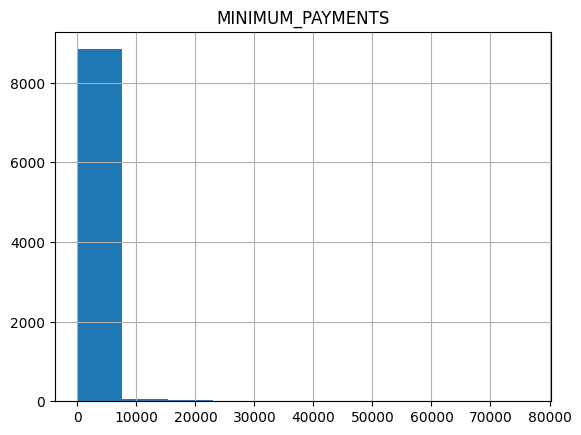

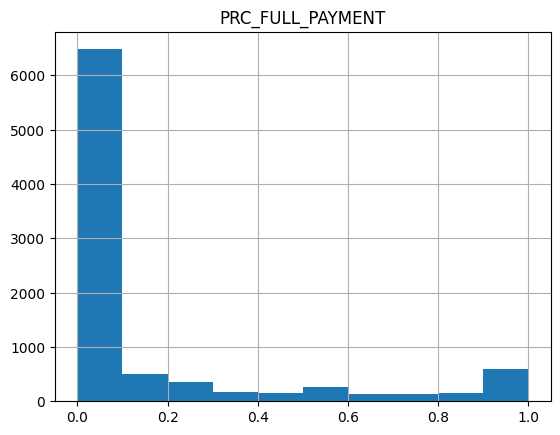

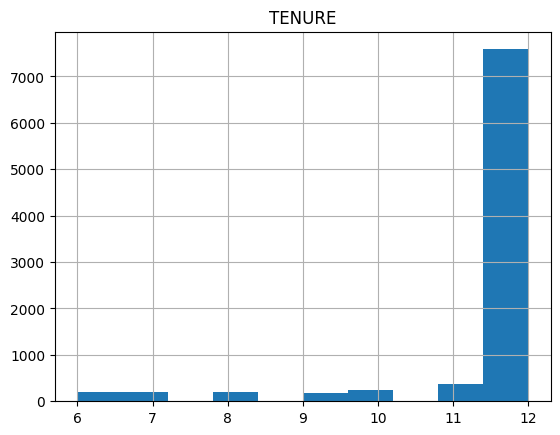

In [ ]:
for col in dfh:
    dfh[[col]].hist()

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dfh)

Many outliers were found so they could not be eliminated since the amount of data would be significantly reduced, so it was decided to normalize the data and avoid the problem that generates outliers.

In [ ]:
dfn = pd.DataFrame(X_scaled)

In [ ]:
from sklearn import preprocessing
dfn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [ ]:
dfn.columns

RangeIndex(start=0, stop=17, step=1)

In [ ]:
dfn.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [ ]:
dfn.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148396,0.034170,0.011310,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121490,0.057078,0.030503,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004392,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.011310,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


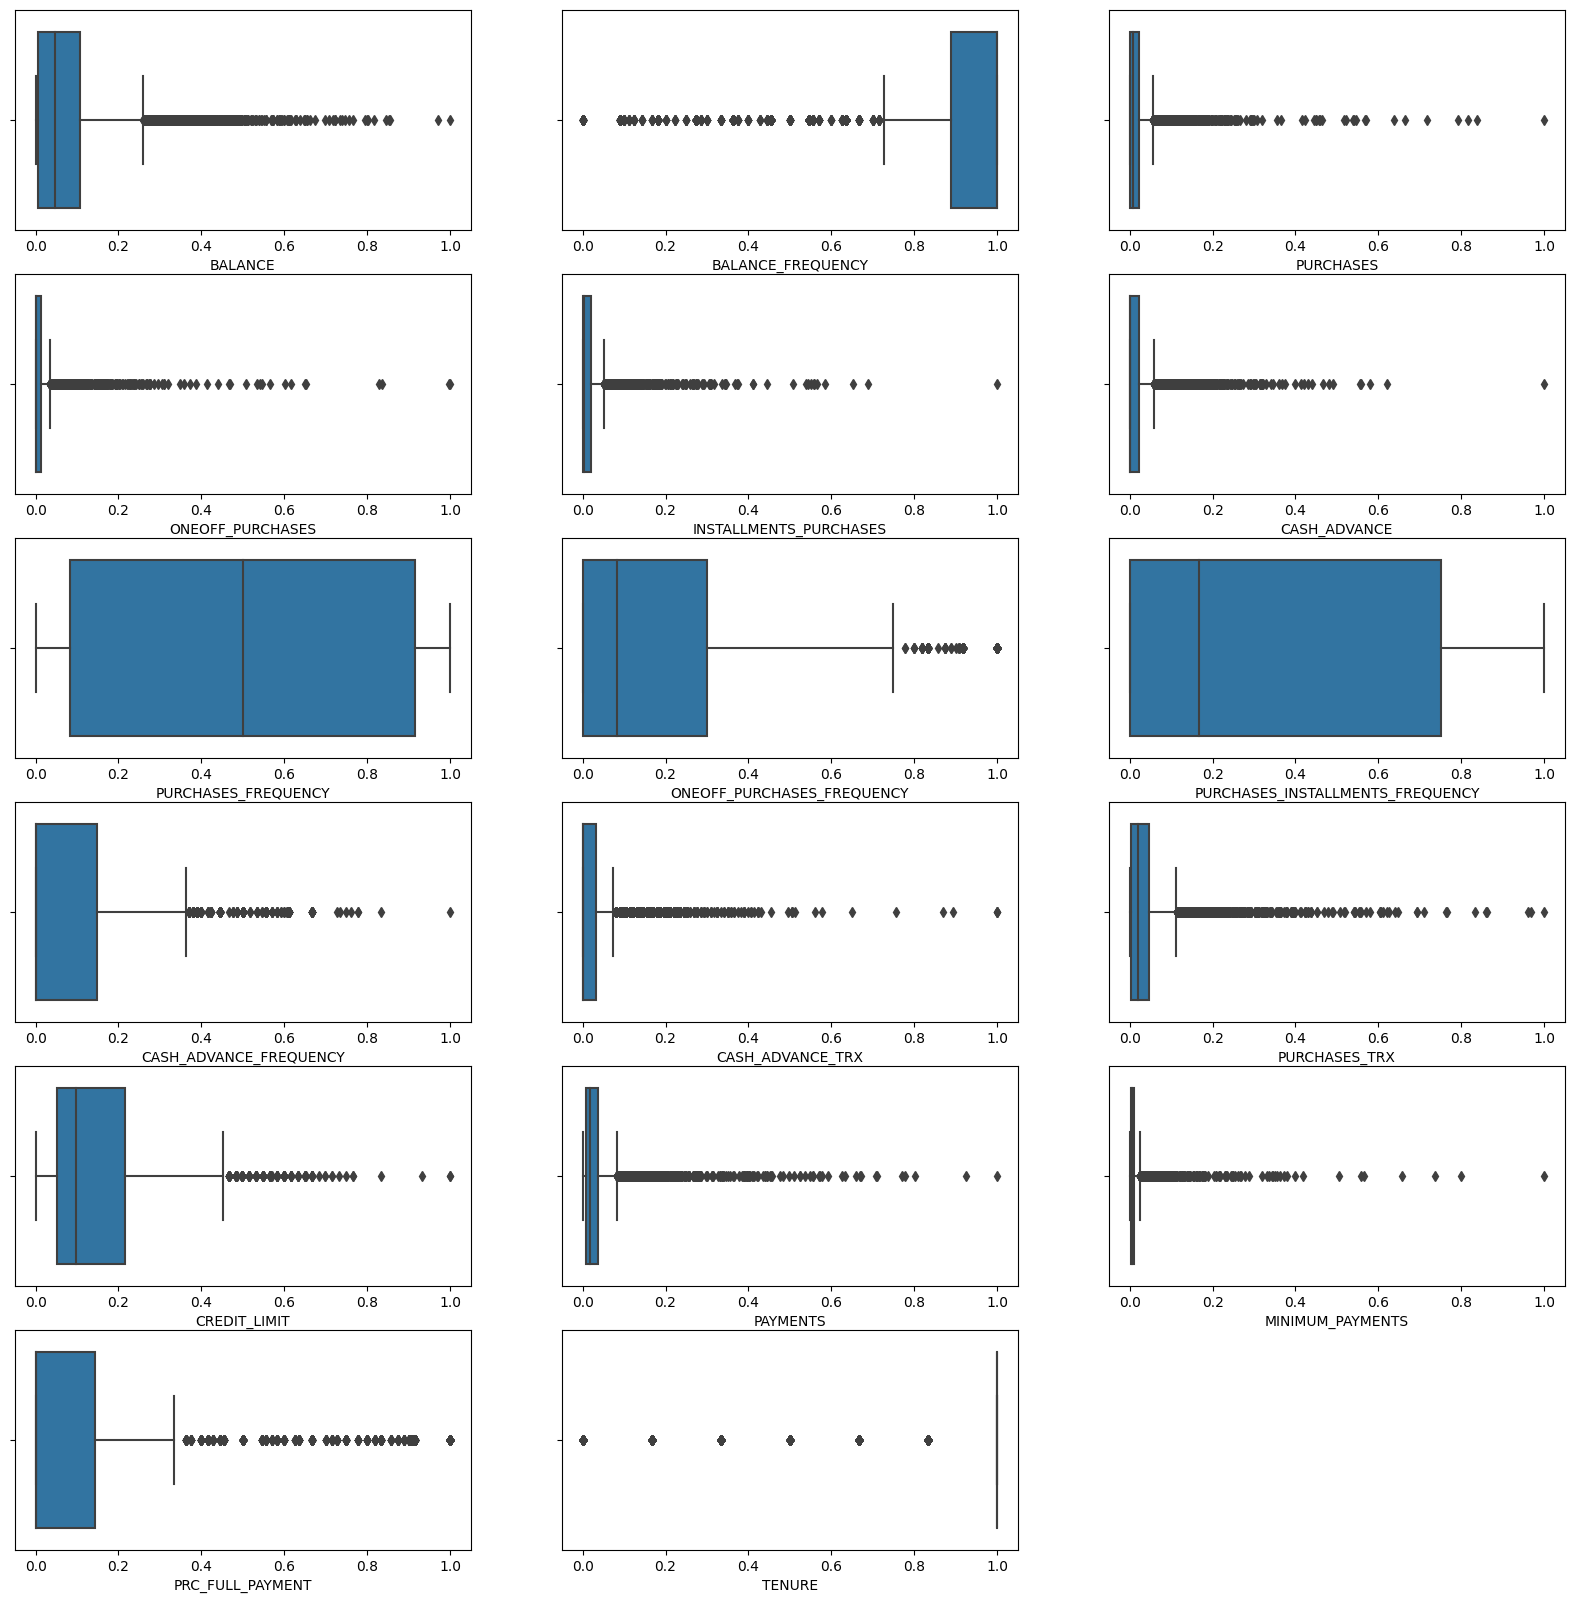

In [ ]:
fig = plt.figure(figsize=(20,20))
for col in range(len(dfn.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=dfn.iloc[ : , col])
plt.show()

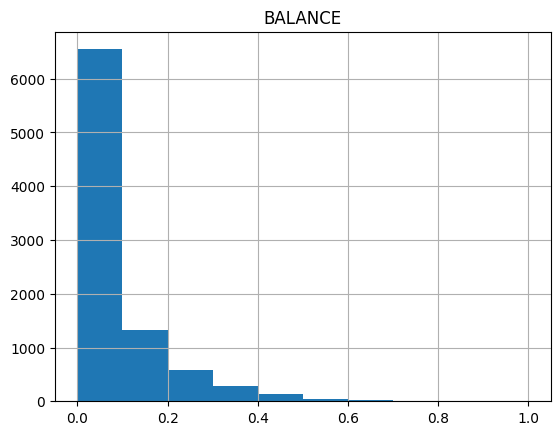

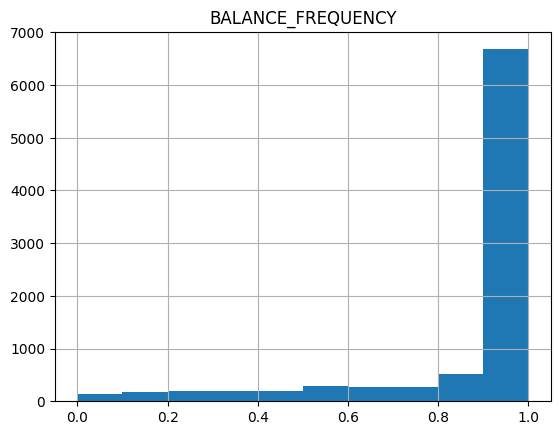

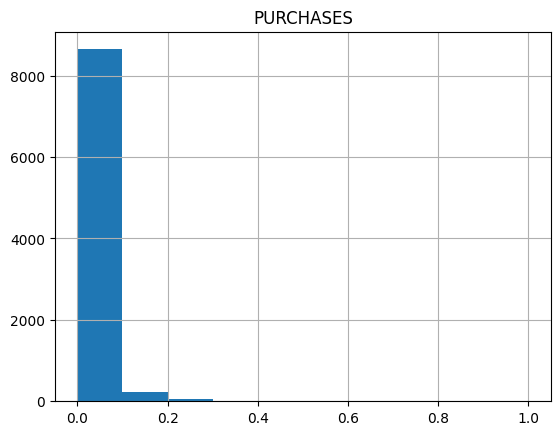

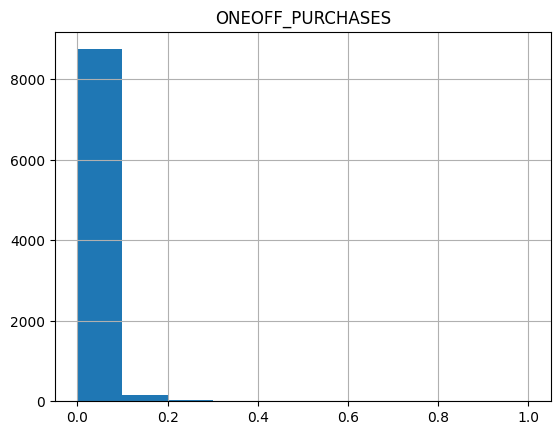

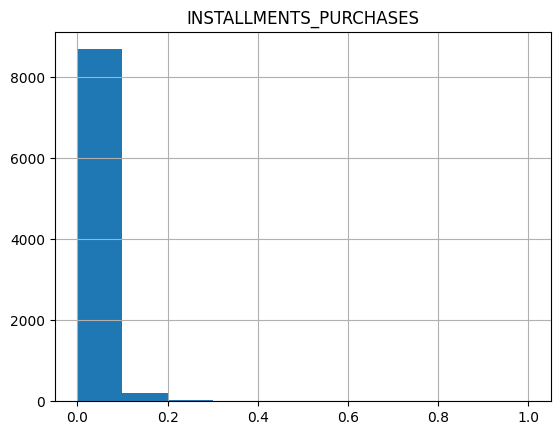

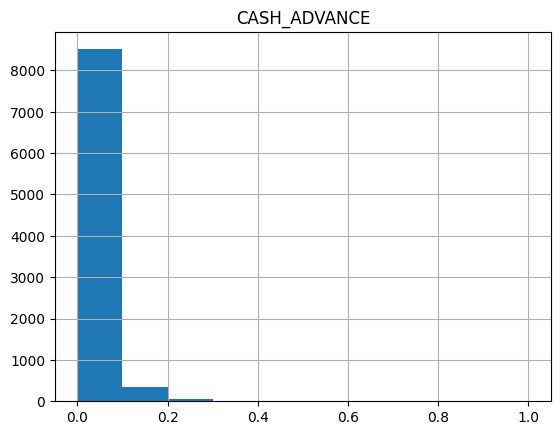

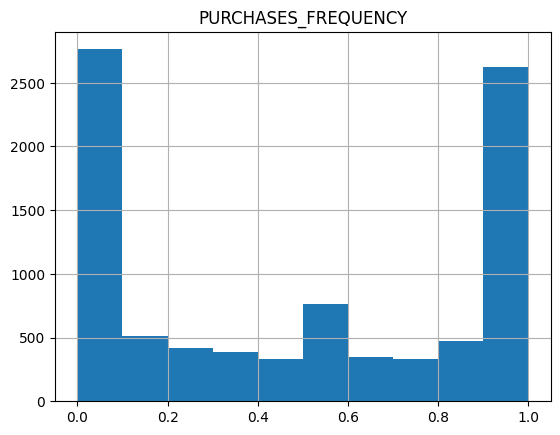

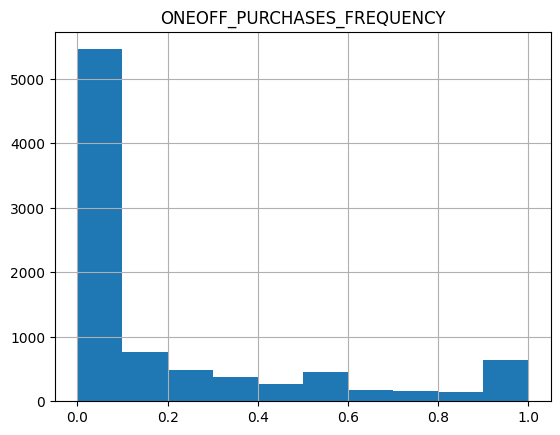

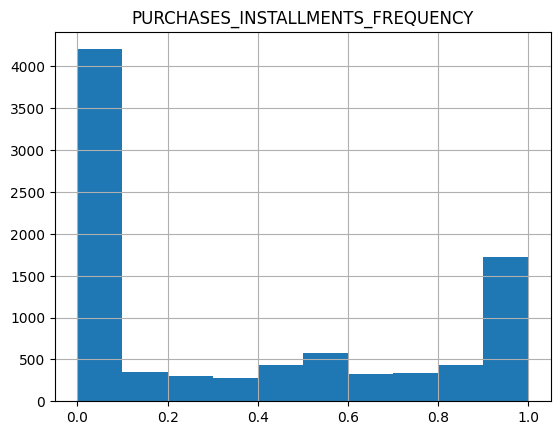

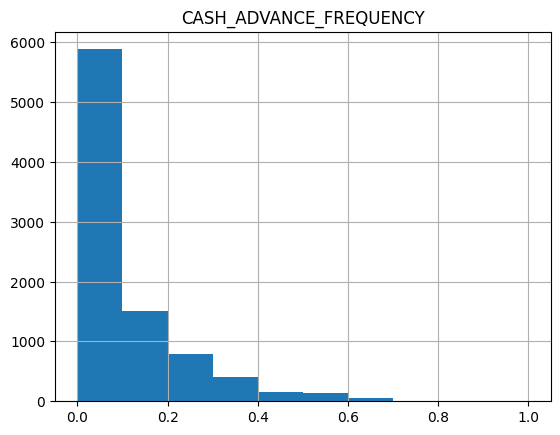

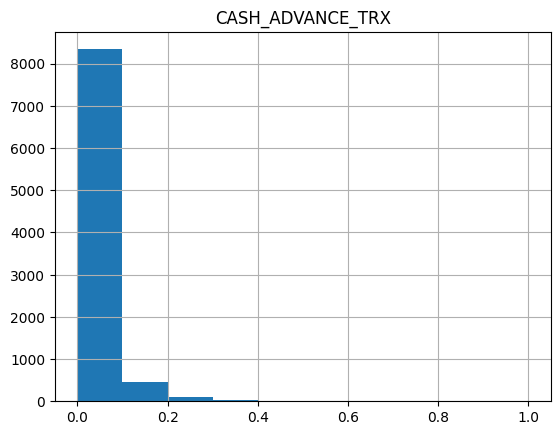

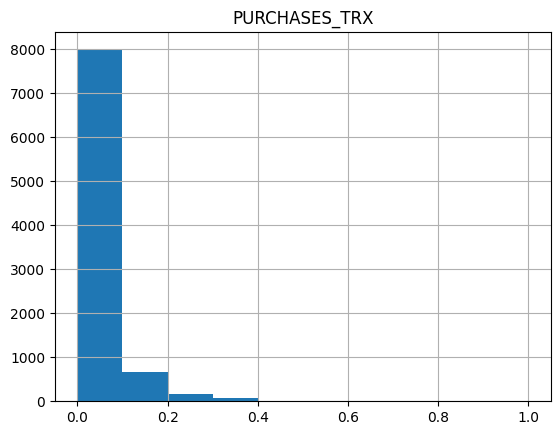

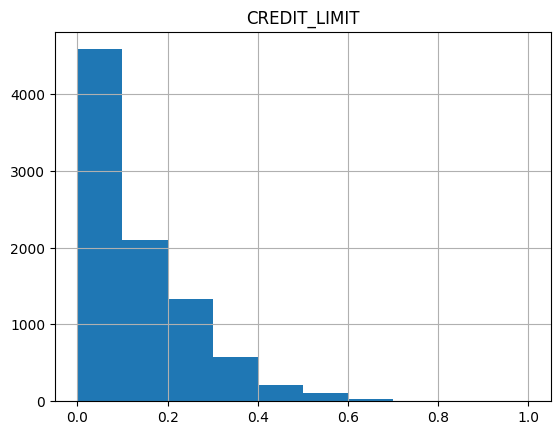

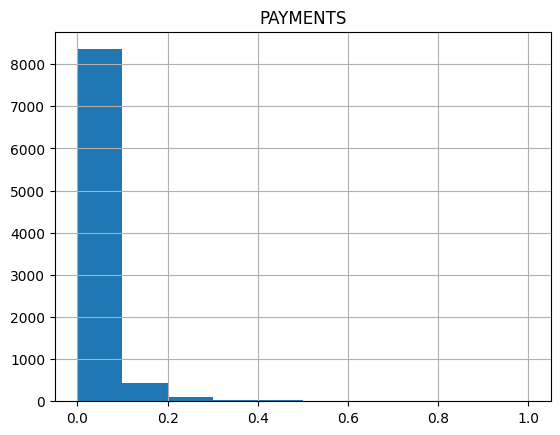

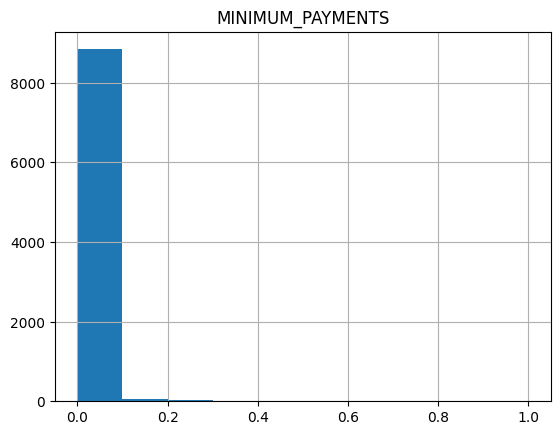

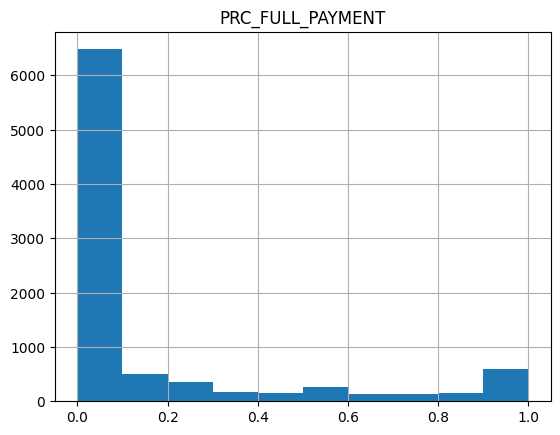

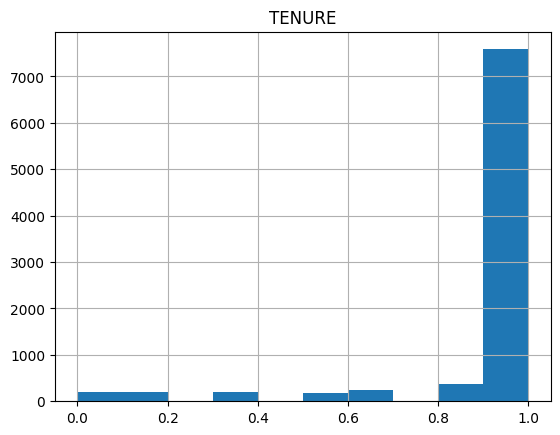

In [ ]:
for col in dfn:
    dfn[[col]].hist()

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dfn)
dfc = pca.transform(dfn)

In [ ]:
dfc.shape

(8950, 2)

We use PCA to reduce the dimensionality of the data so we could be able to graph the clusters correctly

Elbow method

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

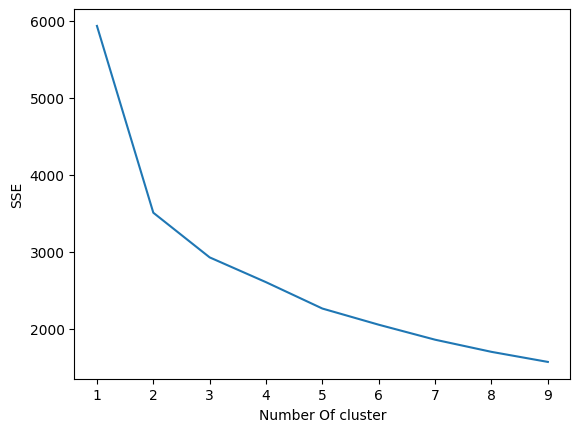

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfn)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number Of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
wcss= []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dfc)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-30-b2e4fa03e2a0>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss, 'bo-', color='c')


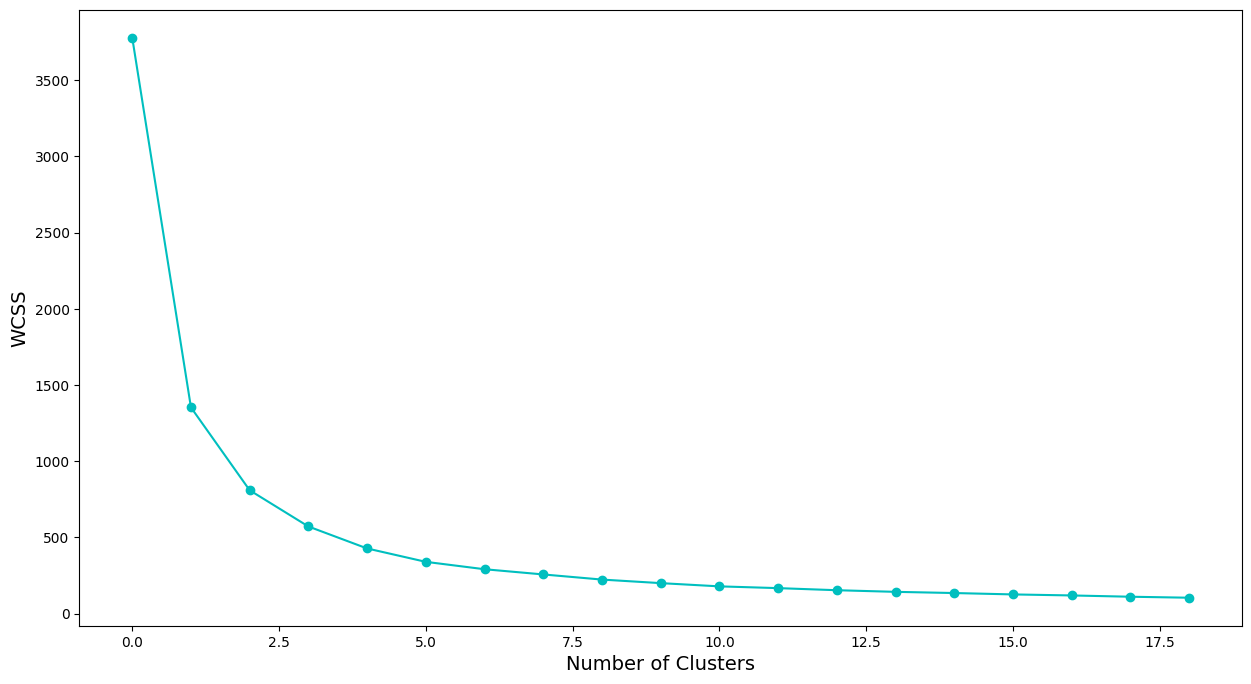

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

We used the elbow method to see how many clusters could be the most appropriate with these data The aim is to define the number of clusters in such a way as to minimize the total variation within the cluster (known as WCSS "quared distance between each point and the centroid in a cluster"). To determine the optimal number of clusters, we have to select the value of "k" at the "elbow", that is, the point after which the distortion, inertia begins to decrease linearly. Therefore, for the given data, we conclude that the optimal number of clusters for the data is 3.

K-means

In [ ]:
kmeans =  KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(dfc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=3)

<ipython-input-32-8ce5688d547e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


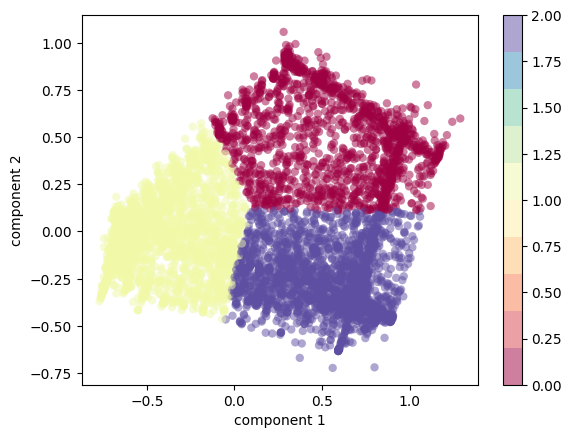

In [ ]:
plt.scatter(dfc[:, 0], dfc[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
dfn["cluster"] = kmeans.labels_.astype(float)

In [ ]:
dfn

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,2.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0,2.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,2.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,1.0


We put in the dataset which cluster each person was going to belong to, so that the data can be analyzed dividing them into clusters and then we can see the characteristics of each group

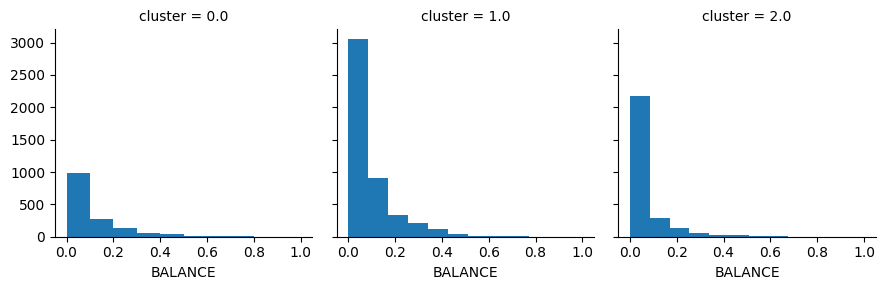

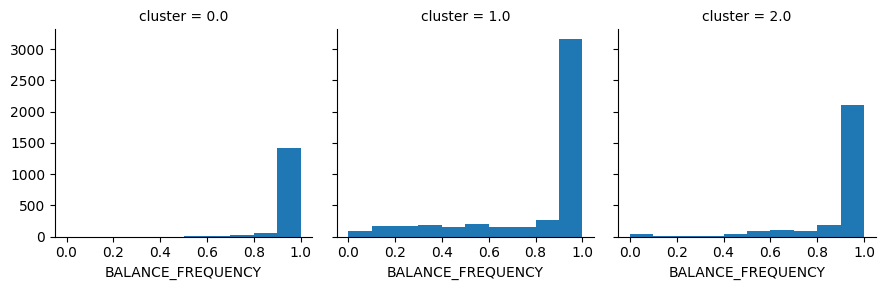

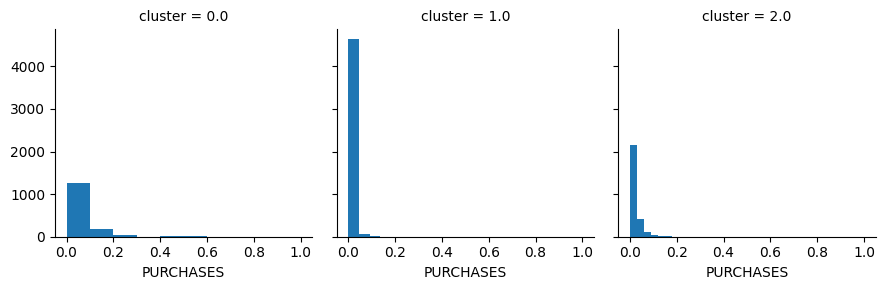

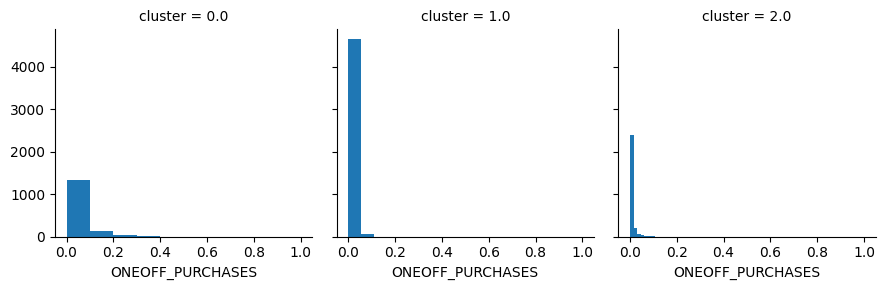

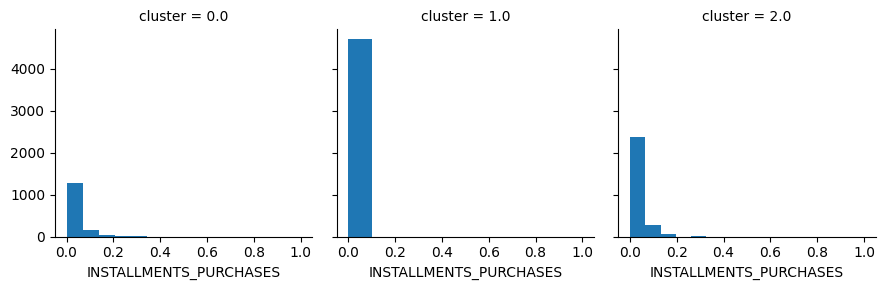

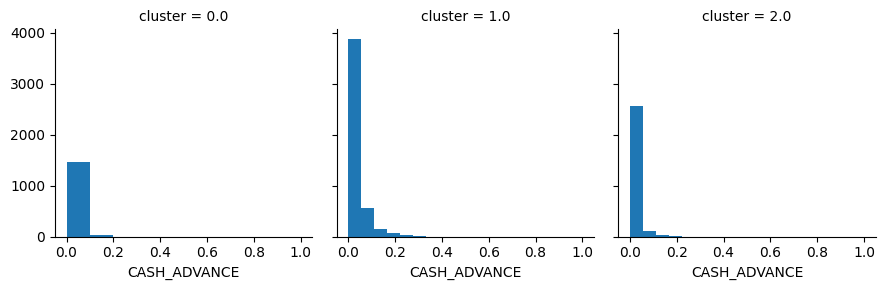

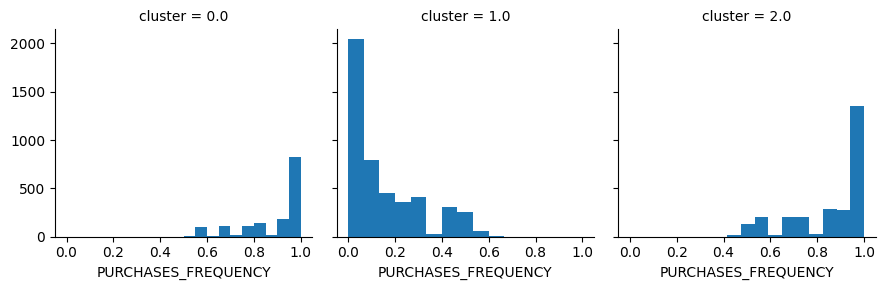

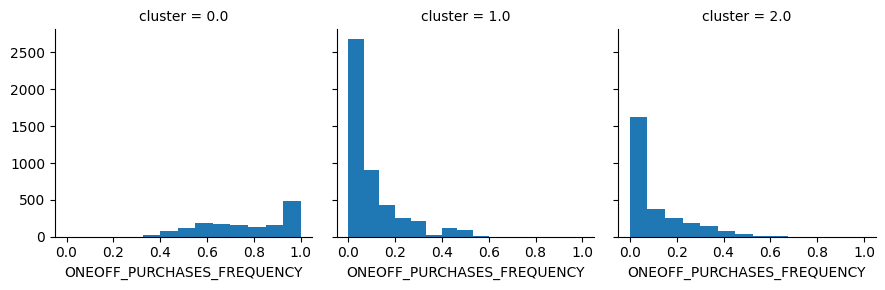

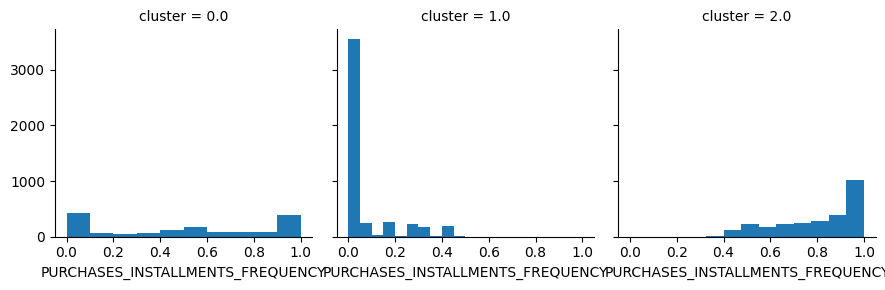

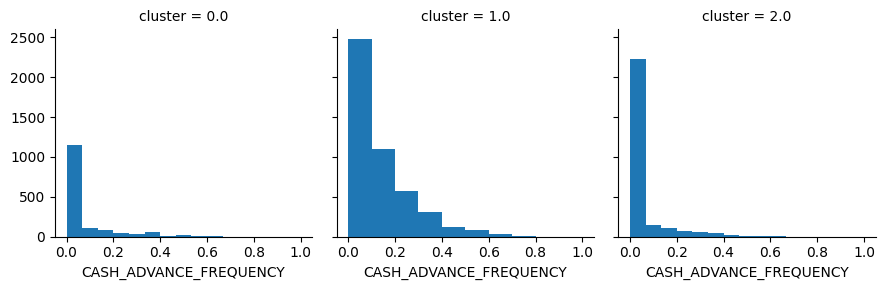

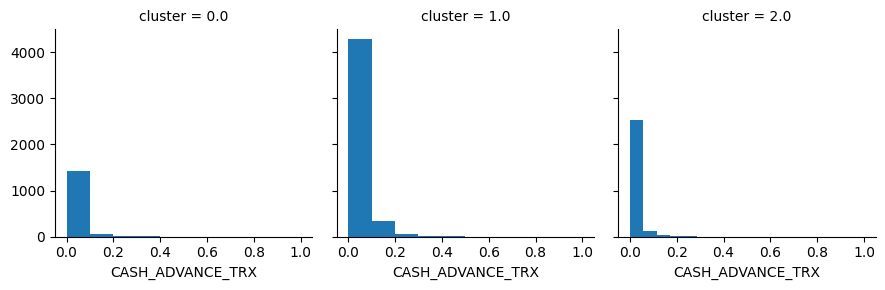

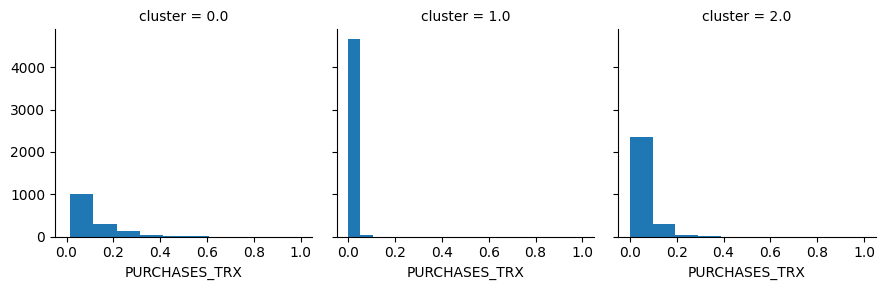

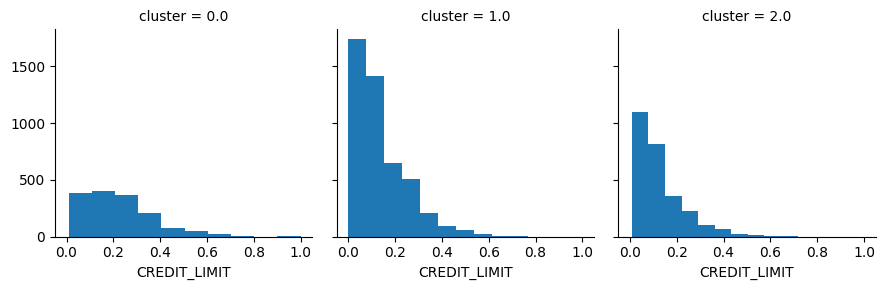

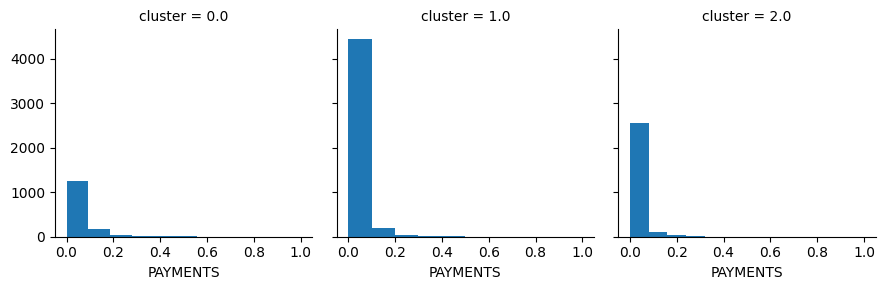

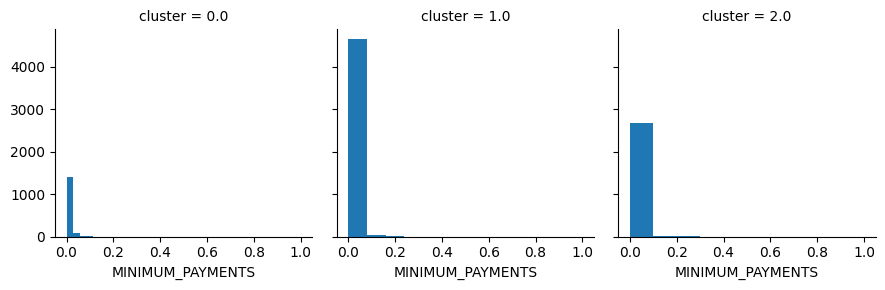

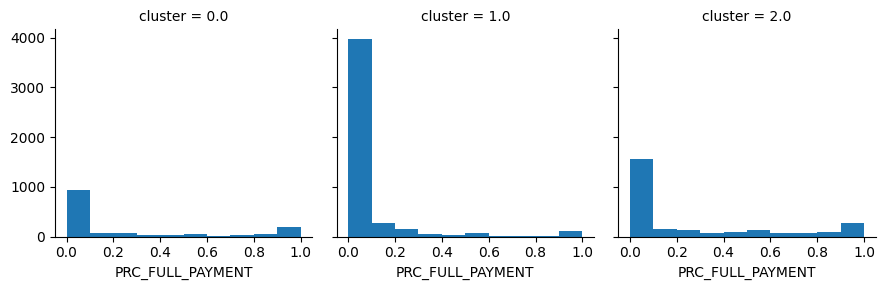

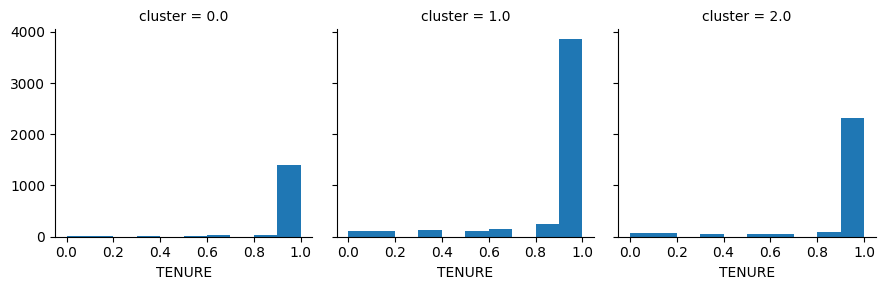

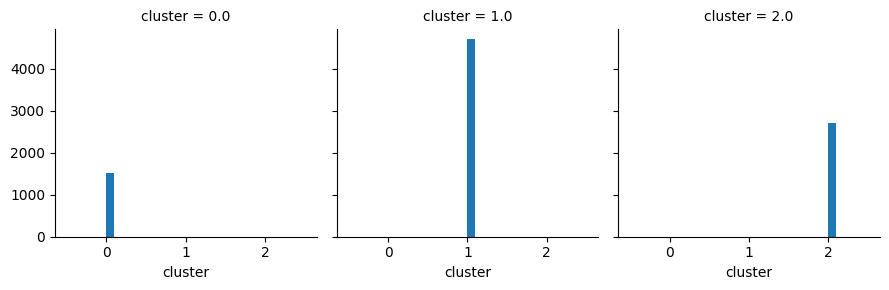

In [ ]:
for c in dfn:
    grid= sns.FacetGrid(dfn, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
dfc

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

DBSCAN

The main concept of the DBSCAN algorithm is to locate high-density regions that are separated from each other by low-density regions. is a simple density algorithm that implements the notion of density by means of a center-based procedure. DBSCAN groups points that are close to each other based on a distance measurement (usually euclidean distance) and a minimum number of points. It also marks points that are in low-density regions as outliers. It is efficient for large volumes of data and efficiently handles the presence of outliers and noise.

In [ ]:
pca = PCA(n_components=2)
pca.fit(dfn)
dfd = pca.transform(dfn)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.5, min_samples=10).fit(dfd)
labels = db.labels_

<ipython-input-40-a86ed80ebaa3>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


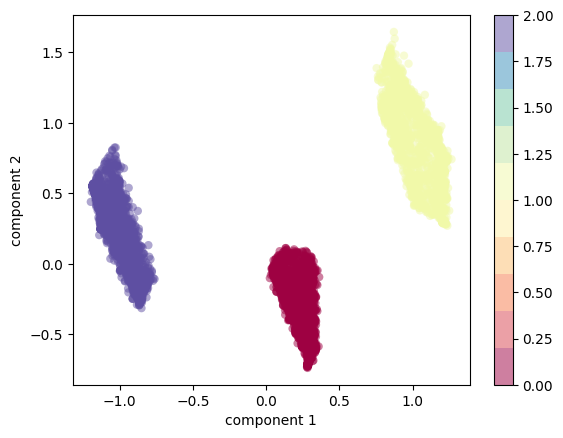

In [ ]:
plt.scatter(dfd[:, 0], dfd[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
dfn["clusterDBSCAN"] = labels.astype(float)
dfn

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,clusterDBSCAN
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1.0,0.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1.0,0.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0.0,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,1.0,0.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,2.0,2.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0,2.0,2.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,2.0,2.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,1.0,0.0


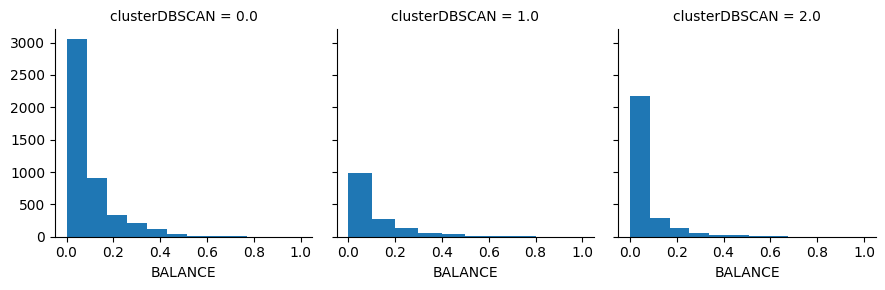

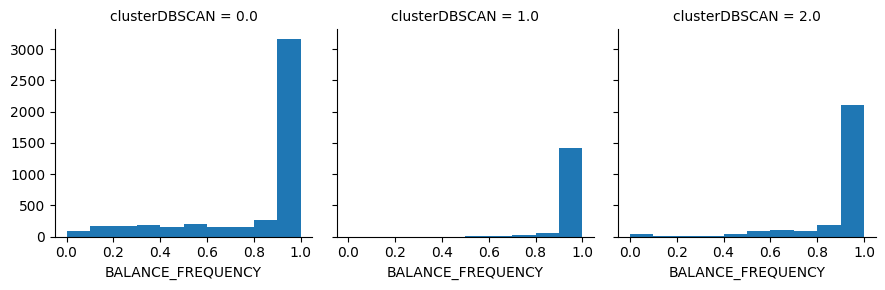

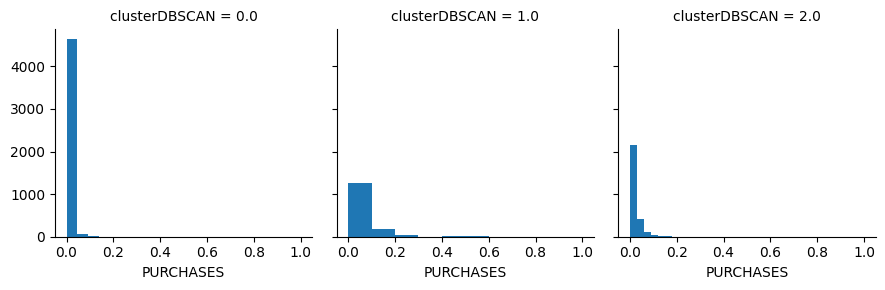

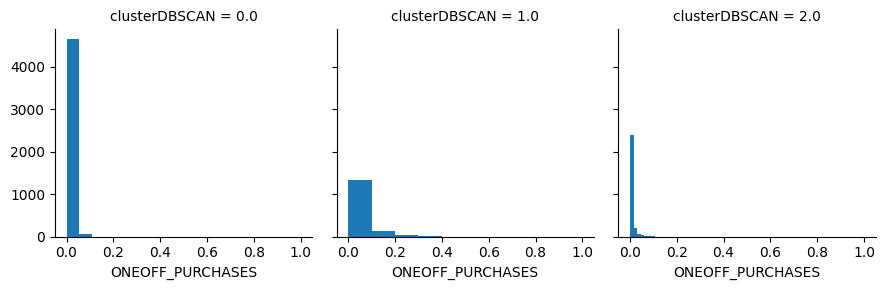

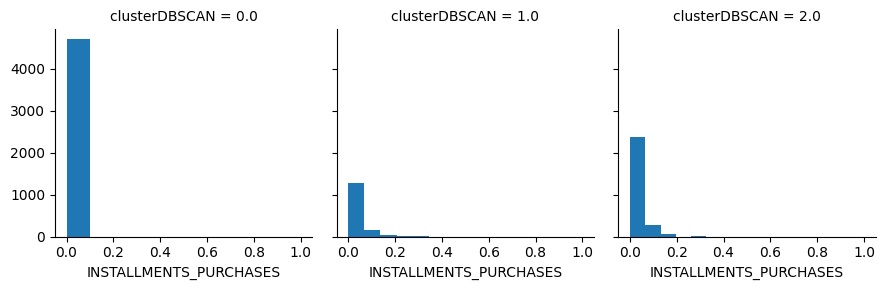

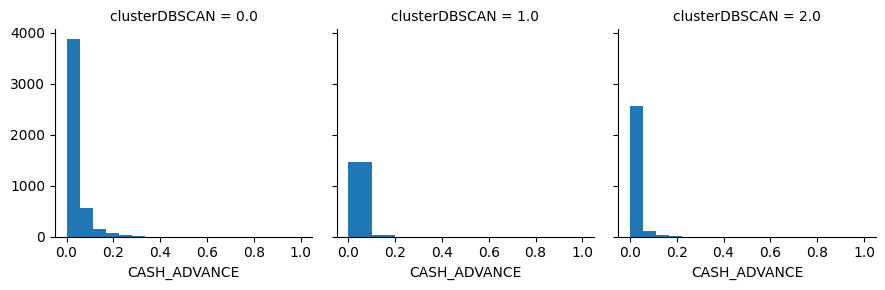

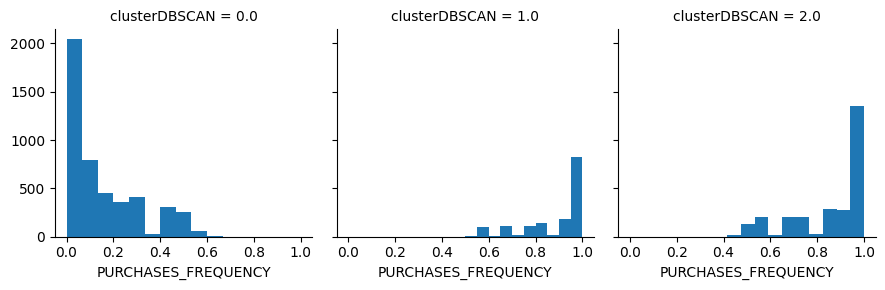

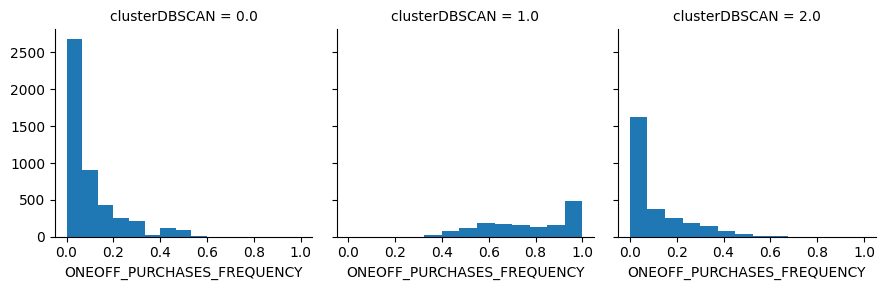

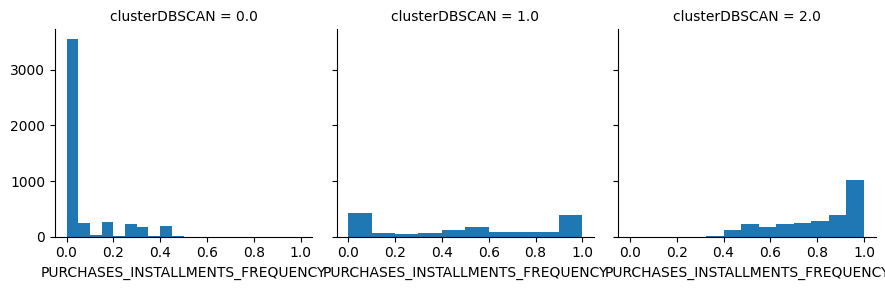

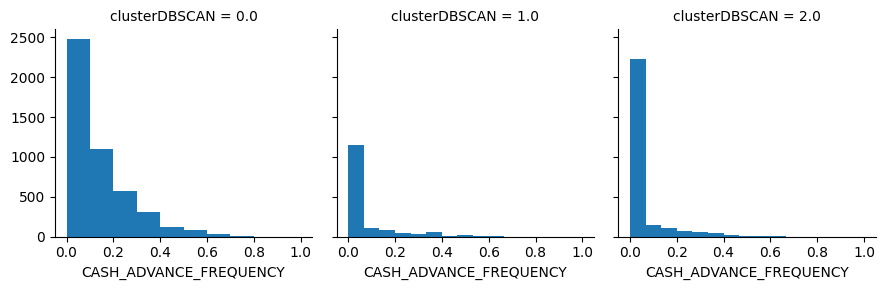

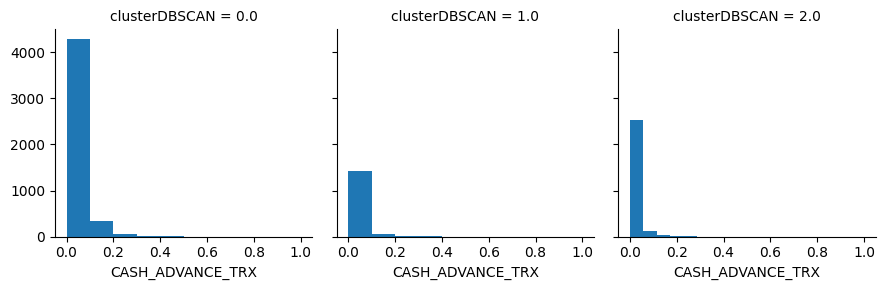

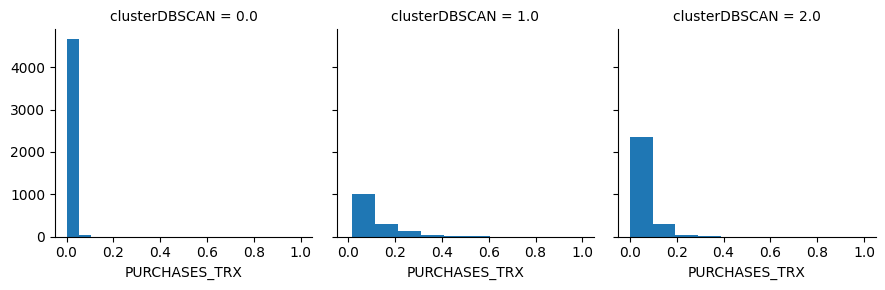

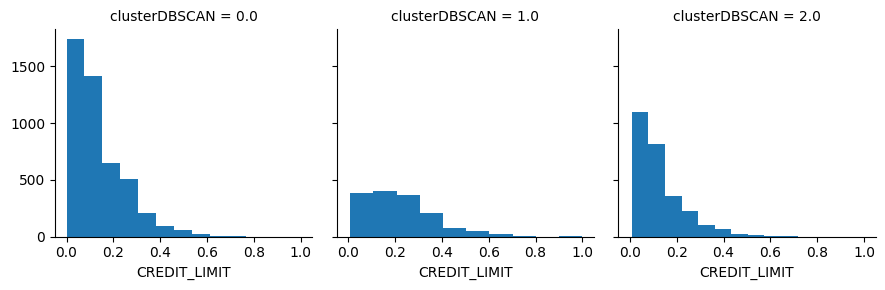

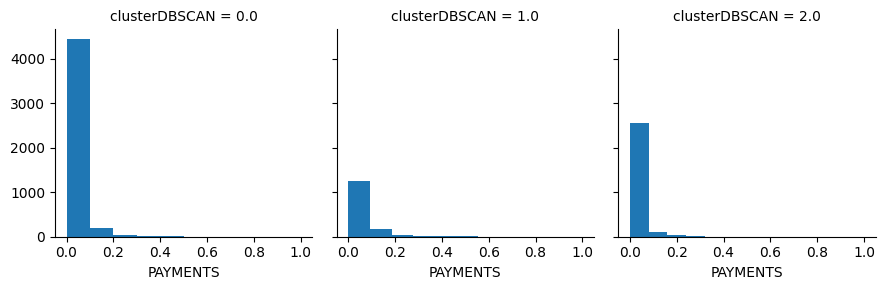

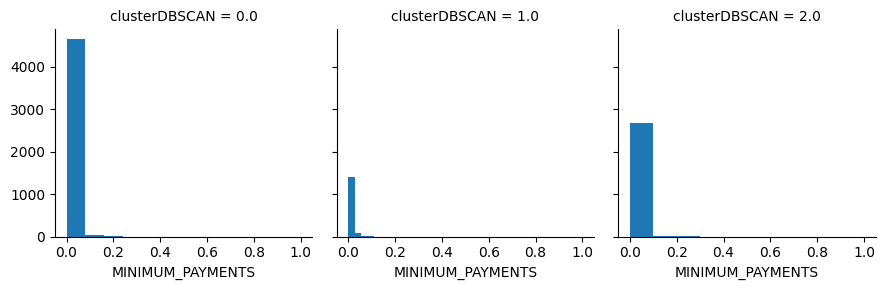

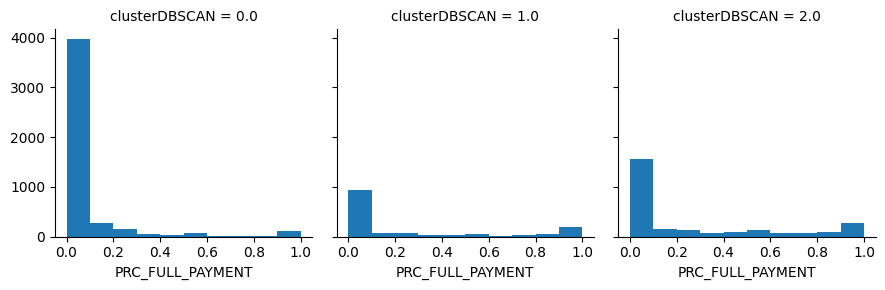

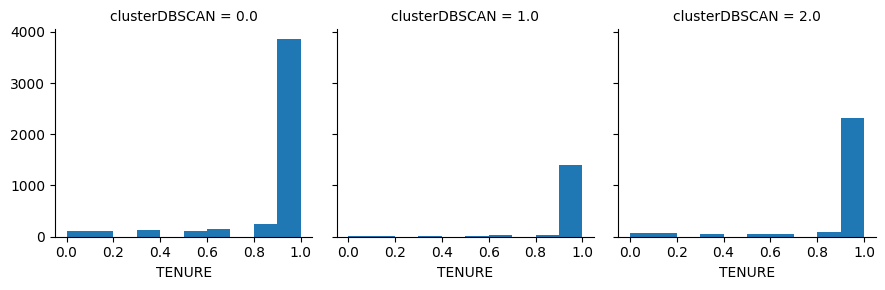

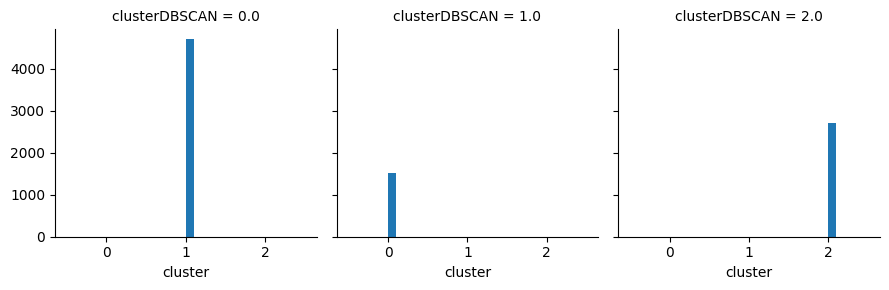

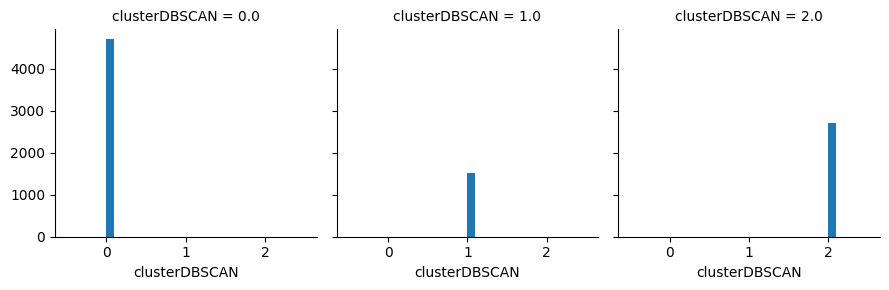

In [ ]:
for c in dfn:
    grid= sns.FacetGrid(dfn, col='clusterDBSCAN')
    grid.map(plt.hist, c)

In [ ]:
dff = dfn.groupby("cluster")

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
dff.describe(include="all")

BALANCE                                                         \
          count      mean       std  min       25%       50%       75%   
cluster                                                                  
0.0      1521.0  0.105862  0.131048  0.0  0.016709  0.056365  0.143604   
1.0      4709.0  0.089928  0.108120  0.0  0.010869  0.056958  0.120158   
2.0      2720.0  0.055438  0.091372  0.0  0.002800  0.014670  0.068685   

                  BALANCE_FREQUENCY                                          \
              max             count      mean       std  min       25%  50%   
cluster                                                                       
0.0      1.000000            1521.0  0.977710  0.075575  0.0  1.000000  1.0   
1.0      0.856208            4709.0  0.827651  0.276428  0.0  0.727273  1.0   
2.0      0.846268            2720.0  0.907010  0.196019  0.0  0.909091  1.0   

                  PURCHASES                                                    \
         75%  max     count      mean       std       min       25%       50%   
cluster                                                                         
0.0      1.0  1.0    1521.0  0.064544  0.081648  0.000171  0.023198  0.043170   
1.0      1.0  1.0    4709.0  0.006057  0.016873  0.000000  0.000000  0.001088   
2.0      1.0  1.0    2720.0  0.020734  0.024120  0.000245  0.006625  0.012485   

                            ONEOFF_PURCHASES                                \
              75%       max            count      mean       std       min   
cluster                                                                      
0.0      0.077031  1.000000           1521.0  0.057240  0.079261  0.000206   
1.0      0.006519  0.458813           4709.0  0.005783  0.017592  0.000000   
2.0      0.025699  0.299474           2720.0  0.005805  0.013453  0.000000   

                                                INSTALLMENTS_PURCHASES  \
              25%       50%       75%       max                  count   
cluster                                                                  
0.0      0.019877  0.036017  0.065139  1.000000                 1521.0   
1.0      0.000000  0.000000  0.005167  0.542225                 4709.0   
2.0      0.000000  0.000000  0.005400  0.155678                 2720.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0.0      0.036979  0.062963  0.000000  0.001177  0.017275  0.046375  0.688764   
1.0      0.002733  0.018182  0.000000  0.000000  0.000000  0.000000  1.000000   
2.0      0.034706  0.040549  0.000533  0.012230  0.022176  0.042840  0.652716   

        CASH_ADVANCE                                                    \
               count      mean       std  min  25%       50%       75%   
cluster                                                                  
0.0           1521.0  0.015355  0.049217  0.0  0.0  0.000000  0.008082   
1.0           4709.0  0.028736  0.047920  0.0  0.0  0.008249  0.038721   
2.0           2720.0  0.009995  0.030694  0.0  0.0  0.000000  0.000775   

                  PURCHASES_FREQUENCY                                          \
              max               count      mean       std       min       25%   
cluster                                                                         
0.0      1.000000              1521.0  0.895054  0.141320  0.500000  0.833333   
1.0      0.555698              4709.0  0.142406  0.167764  0.000000  0.000000   
2.0      0.557282              2720.0  0.866424  0.165974  0.416667  0.750000   

                                  ONEOFF_PURCHASES_FREQUENCY            \
              50%   75%       max                      count      mean   
cluster                                                                  
0.0      1.000000  1.00  1.000000             

In [ ]:
dfh["cluster"] = kmeans.labels_.astype(float)

In [ ]:
dfhh = dfh.groupby("cluster")

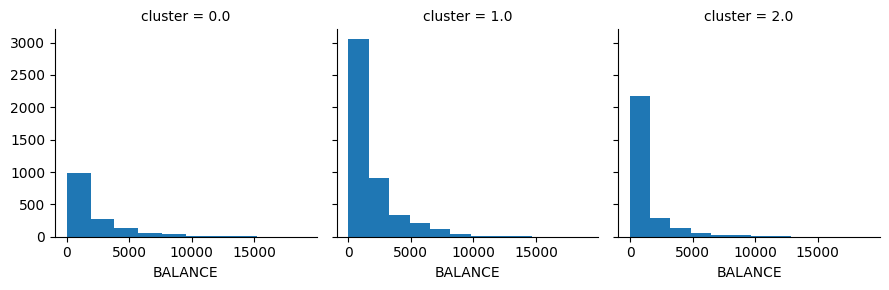

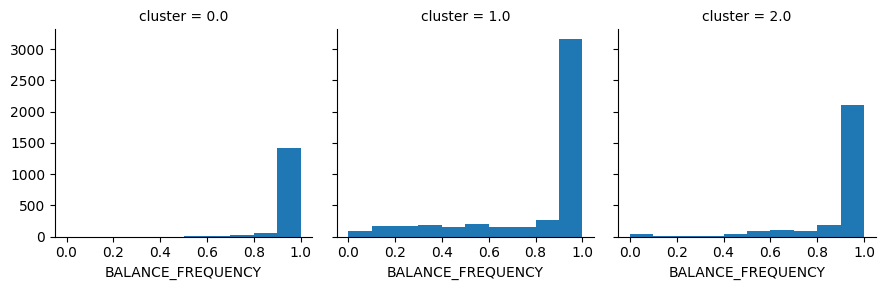

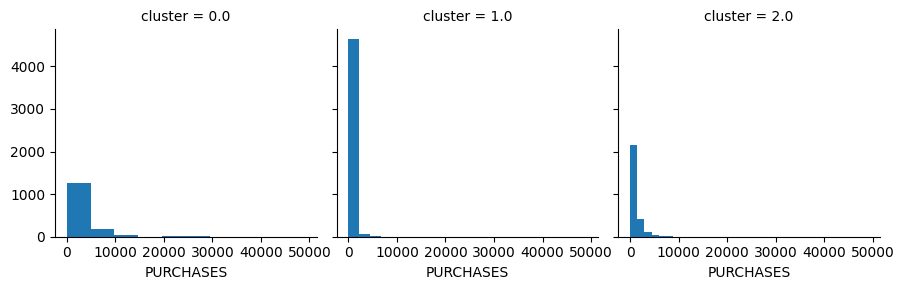

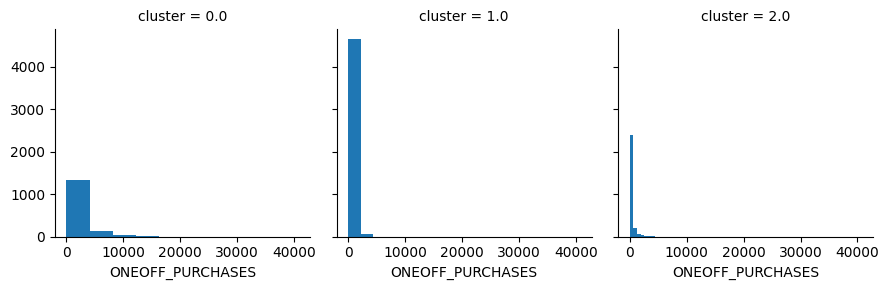

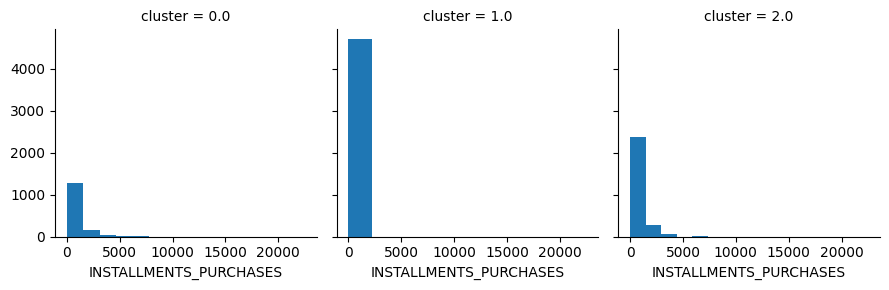

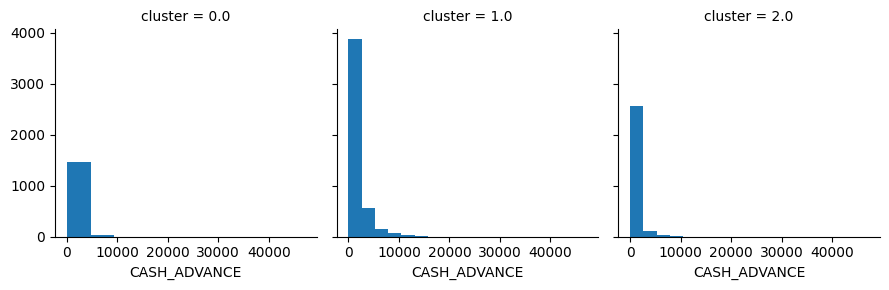

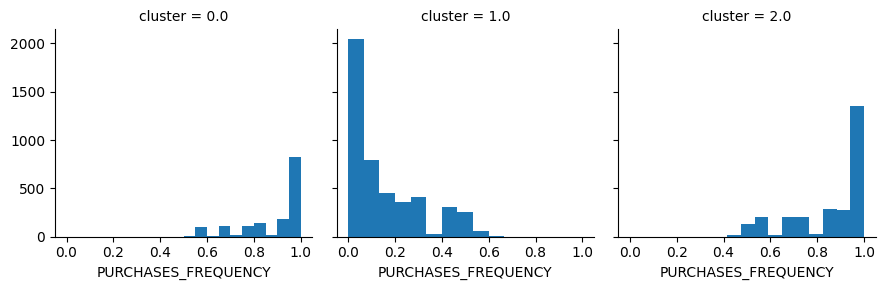

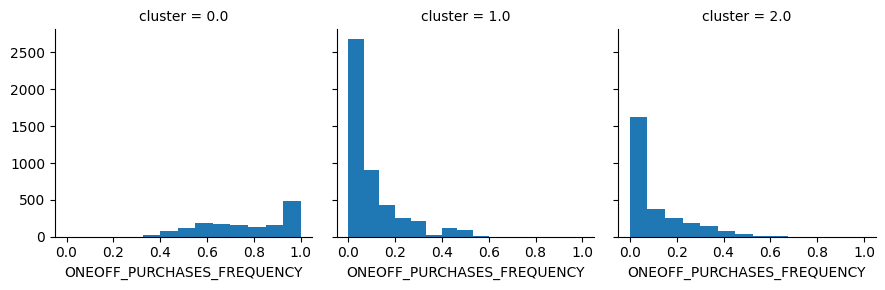

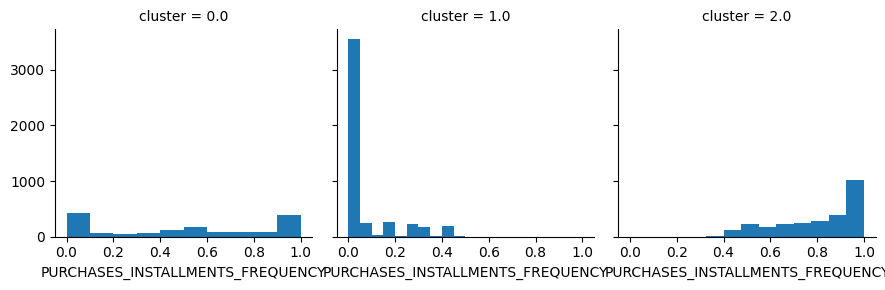

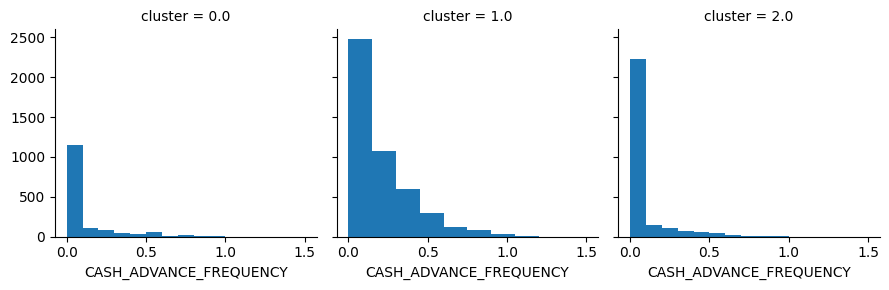

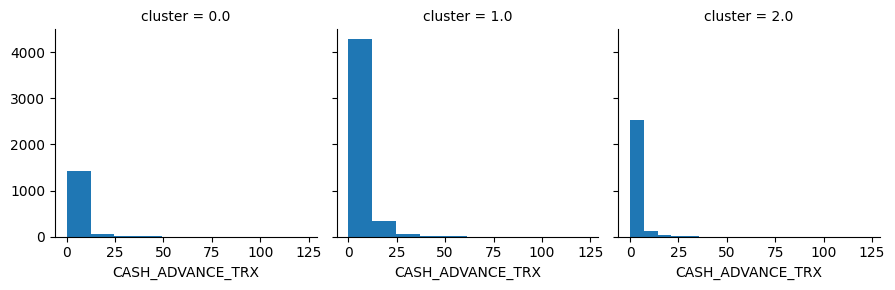

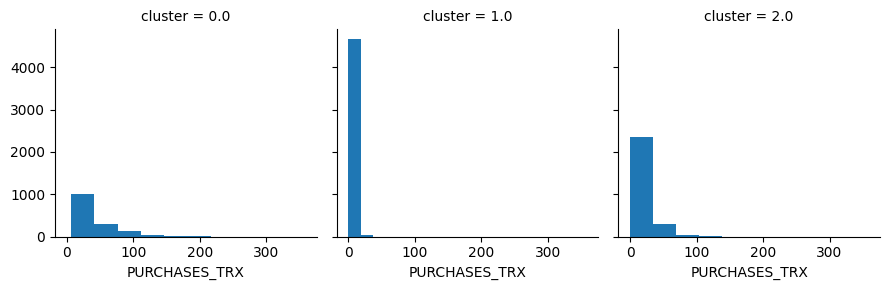

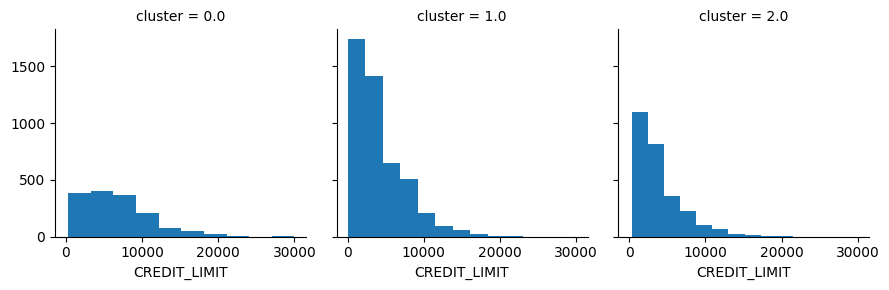

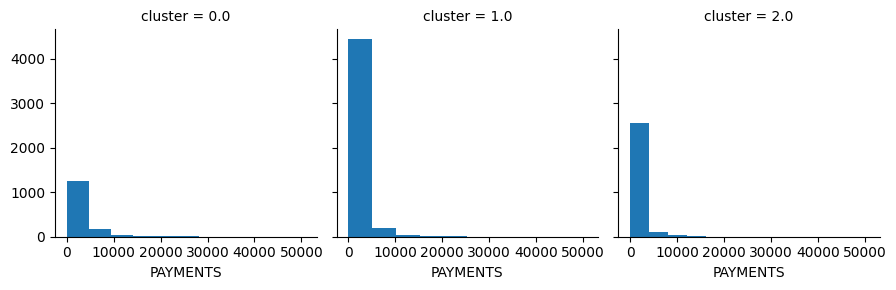

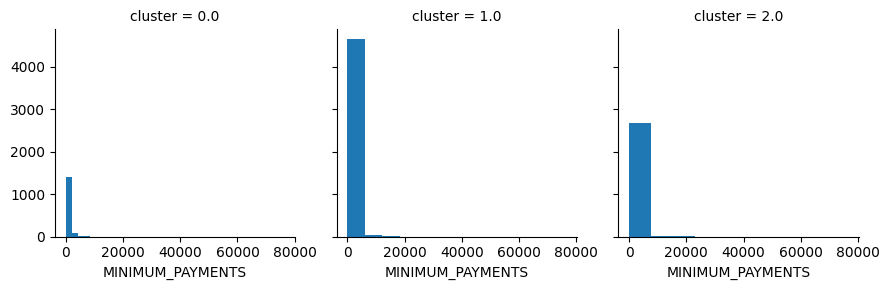

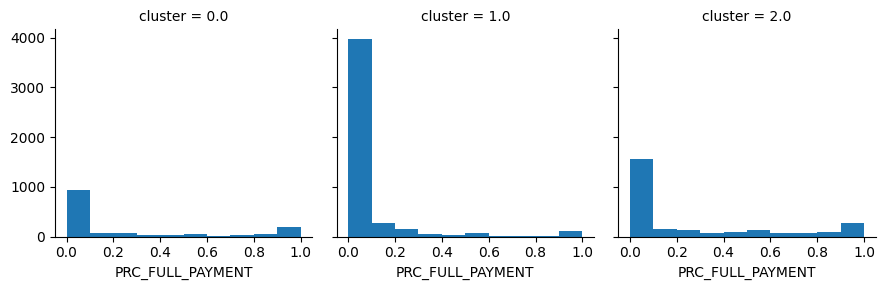

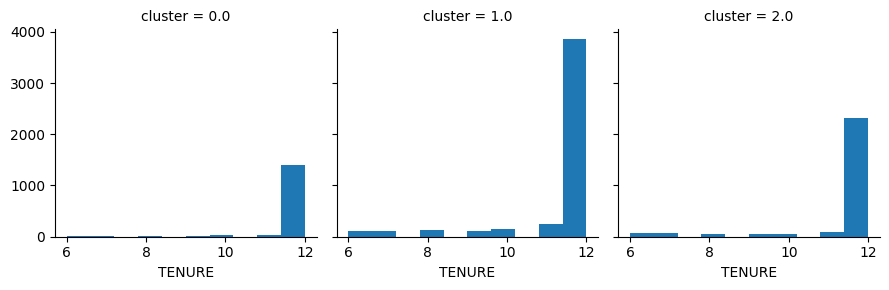

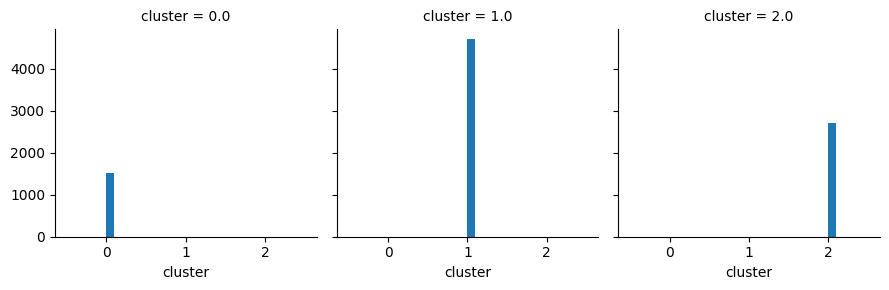

In [ ]:
dfh.describe()
for c in dfh:
    grid= sns.FacetGrid(dfh, col='cluster')
    grid.map(plt.hist, c)